# <font color= 'blue'> Machine Learning
# <font color='blue'> Project 2 </font>

## <font color= 'blue'> Classifying with Reduced Dimensionality
Mehek Niwas || MTH 4224 Spring 2024

#### Combining unsupervised and supervised machine learning methods to classify images

# <font color= 'blue'> Goals

*1) Use an unsupervised machine learning algorithm such as PCA to reduce the dimensionality of the dataset*

*2)  Use supervised machine learning algorithms such as LDA and QDA to classify the reduced-dimensionality images into 1 of 10 classes of clothing/fashion items*

# <font color= 'blue'> Fashion MNIST Dataset
The dataset is called Fashion-MNIST and was originally sourced from Zalando's article images. It consists of 60,000 examples in the training set and 10,000 examples in the test set. The images are originally in grayscale (in viridis), although matplotlib can be used to display them in color. Link: https://www.kaggle.com/datasets/zalando-research/fashionmnist

Data needed to be normalized before principal component analysis as a form of standarization for more accurate and meaningful calculations.

#### **Input: Features**
Train Shape: 42,000 images x (28 x 28 x 1)

Val/Test Shape: 14,000 images x (28 x 28 x 1)

#### **Output: Income**
classes:
t-shirt/top (0), trouser (1), pullover (2), dress (3), coat (4), sandal (5), shirt (6), sneaker (7), bag (8), ankle boot (9)

# <font color= 'blue'> Setup

## Imports

In [ ]:
import numpy as np
import seaborn as sn
import time

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, IncrementalPCA, SparsePCA

import tensorflow as tf
# keras is now its own module in tensorflow
# don't do: from tensorflow import keras
# do directly: from keras ...
from keras.datasets import fashion_mnist

## Dataset
Originally tried doing PCA individually for each train, validation, test data split. However, it was causing different results for the new dimensions, so the pre-split had to be concatenated together before applying PCA and then re-split again.

Note: Important to normalize data before PCA algorithm is applied

In [ ]:
# (trainX, trainY), (testX, testY) = mnist.load_data()
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
print()
print("Original Training Input Images: ", trainX.shape)
print("Original Testing Input Images: ", testX.shape)
print()

# flatten images
print("Flattening...")
trainX = trainX.reshape(trainX.shape[0], trainX.shape[1] * trainX.shape[2])
testX = testX.reshape(testX.shape[0], testX.shape[1] * testX.shape[2])

print("Training Input Images: ", trainX.shape)
# print("Validing Input Images: ", validX.shape)
print("Testing Input Images: ", testX.shape)
print()

print("Concatenating for PCA...")
X = np.vstack((trainX, testX))
Y = np.concatenate((trainY, testY))

# normalize the data
X = X / 255.0
print("Full Input Shape: ", X.shape)
print("Full Output Shape: ", Y.shape)

# apply PCA after this

4422102/4422102 [==============================] - 1s 0us/step

Original Training Input Images:  (60000, 28, 28)
Original Testing Input Images:  (10000, 28, 28)

Flattening...
Training Input Images:  (60000, 784)
Testing Input Images:  (10000, 784)

Concatenating for PCA...
Full Input Shape:  (70000, 784)
Full Output Shape:  (70000,)


In [ ]:
# apply PCA, then use un_concatenate for QDA
def un_concatenate(X, Y, u_print = True): # train, valid, test splitting
  # train-test split
  trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.40, shuffle=True, random_state = 1)

  # valid-test split
  validX, testX, validY, testY = train_test_split(testX, testY, test_size = 0.50, shuffle=True, random_state = 140)
  # checking shapes
  if u_print: # print == True
    print("After train test split: ")
    print("Train: ", trainX.shape) # 42,000 --> 60%
    print("Valid: ", validX.shape) # 14,000 --> 20%
    print("Test: ", testX.shape)   # 14,000 --> 20%
    print()

  return trainX, validX, testX, trainY, validY, testY

In [ ]:
def train_QDA(u_reg_param, trainX, trainY):
  # fit the model to the training data
  print('Now training QDA...')

  start = time.time()
  model = QuadraticDiscriminantAnalysis(reg_param = u_reg_param)
  model.fit(trainX, trainY)
  end = time.time()
  print('QDA training is finished after', end - start, 'seconds')
  print()
  return model

def get_metrics(model, u_reg_param, string, dataX, dataY): # string is training or validation or testing
  # predict the labels of the test set
  print(string, 'metrics for QDA...')
  predictedY = model.predict(dataX)
  # print quality metrics
  print(string, 'Classification Report for reg_param =', u_reg_param)
  print(classification_report(dataY, predictedY))
  print(string, 'Confusion Matrix:')
  svm = sn.heatmap(confusion_matrix(dataY, predictedY))
  figure = svm.get_figure()
  figure.savefig("latest_cm.png", dpi=400)


  return predictedY

# <font color= 'blue'> Benchmark Model: QDA Only
Benchmark model with no optimization or tuning of parameters. Data was not normalized before running model.
## val accuracy: 68%

In [ ]:
trainX, validX, testX, trainY, validY, testY = un_concatenate(X, Y)
model = train_QDA(0.05, trainX, trainY) # syntax: trainQDA(reg_param, trainX, trainY)

After train test split: 
Train:  (42000, 784)
Valid:  (14000, 784)
Test:  (14000, 784)

Now training QDA...


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA training is finished after 10.732503890991211 seconds



Training metrics for QDA...
Training Classification Report for reg_param = 0.05
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      4237
           1       0.79      0.97      0.88      4228
           2       0.89      0.60      0.72      4167
           3       0.61      0.73      0.66      4135
           4       0.51      0.85      0.64      4150
           5       0.97      0.45      0.61      4175
           6       0.81      0.31      0.45      4215
           7       0.59      0.98      0.74      4230
           8       0.94      0.91      0.92      4230
           9       0.97      0.86      0.91      4233

    accuracy                           0.74     42000
   macro avg       0.80      0.74      0.74     42000
weighted avg       0.80      0.74      0.74     42000

Training Confusion Matrix:


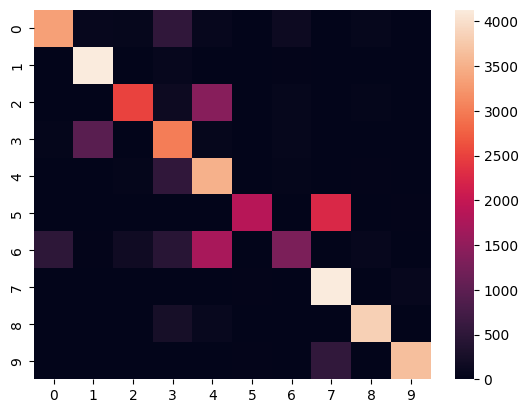

In [ ]:
train_predictedY = get_metrics(model, 0.05, "Training", trainX, trainY) # syntax: trainQDA(model, reg_param, string, trainX, trainY)

Validation metrics for QDA...
Validation Classification Report for reg_param = 0.05
              precision    recall  f1-score   support

           0       0.82      0.73      0.77      1407
           1       0.79      0.92      0.85      1419
           2       0.80      0.43      0.56      1396
           3       0.56      0.70      0.62      1378
           4       0.45      0.74      0.56      1413
           5       0.91      0.40      0.56      1410
           6       0.41      0.20      0.27      1439
           7       0.58      0.95      0.72      1374
           8       0.84      0.90      0.87      1379
           9       0.93      0.84      0.88      1385

    accuracy                           0.68     14000
   macro avg       0.71      0.68      0.67     14000
weighted avg       0.71      0.68      0.66     14000

Validation Confusion Matrix:


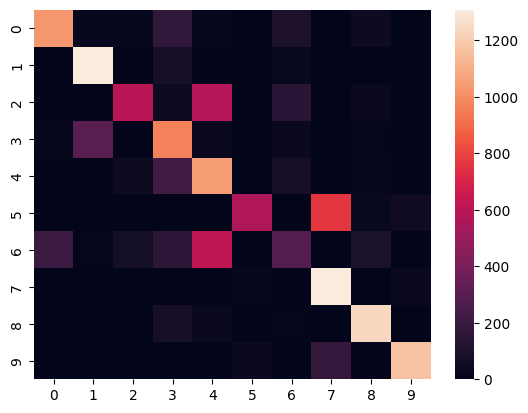

In [ ]:
valid_predictedY = get_metrics(model, 0.05, "Validation", validX, validY) # syntax: trainQDA(model, reg_param, string, trainX, trainY)

# <font color= 'blue'> Experiment 1: Using PCA
### 0.80 cumulative explained variance
Included normization of data before applying PCA. Used PCA function from sklearn

## PCA
## val accuracy: 78%
with QDA

### 0.80 cumulative explained variance

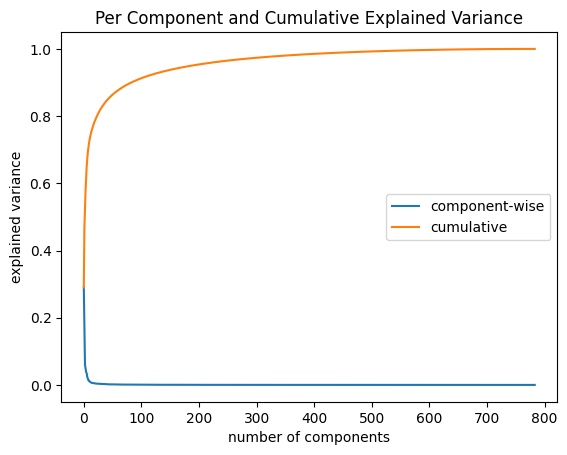

In [ ]:
# Plot PCA for usage
pca = PCA().fit(X) # PCA from sklearn library / API
plt.xlabel('number of components')
plt.ylabel('explained variance')
line1, = plt.plot(range(784), pca.explained_variance_ratio_, label='component-wise')
line2, = plt.plot(range(784), np.cumsum(pca.explained_variance_ratio_), label='cumulative')
plt.legend(handles=[line1, line2])
plt.title("Per Component and Cumulative Explained Variance")
plt.savefig("explained_var_graph")
# will only be able to use number of components instead of explained variance metric for incremental pca

In [ ]:
# Use PCA
trainX, validX, testX, trainY, validY, testY = un_concatenate(X, Y, u_print=False)
print("Original Image Shape:", trainX[0].shape) # number of columns that the first image has

print()
print('Now using PCA dimensionality reduction...')
# create a PCA model with two components

pca = PCA(n_components = 0.80)
# transform the data
start = time.time()
A = pca.fit_transform(X)
end = time.time()
print('PCA finished in', end - start, 'seconds')
print()
print("Cummulative explained variance ratio: ", sum(pca.explained_variance_ratio_))
print("Reduced Dimensionality Image Shape: ", A[0].shape)
print()
red_trainX, red_validX, red_testX, trainY, validY, testY = un_concatenate(A, Y)

reg_param = 0.05
model = train_QDA(reg_param, red_trainX, trainY) # syntax: trainQDA(reg_param, trainX, trainY)

Original Image Shape: (784,)

Now using PCA dimensionality reduction...
PCA finished in 28.17245364189148 seconds

Cummulative explained variance ratio:  0.8009623450821356
Reduced Dimensionality Image Shape:  (24,)

After train test split: 
Train:  (42000, 24)
Valid:  (14000, 24)
Test:  (14000, 24)

Now training QDA...
QDA training is finished after 0.06900715827941895 seconds



Training metrics for QDA...
Training Classification Report for reg_param = 0.05
              precision    recall  f1-score   support

           0       0.72      0.83      0.77      4237
           1       0.95      0.96      0.95      4228
           2       0.74      0.75      0.75      4167
           3       0.74      0.88      0.80      4135
           4       0.71      0.74      0.73      4150
           5       0.96      0.59      0.73      4175
           6       0.67      0.39      0.49      4215
           7       0.64      0.96      0.77      4230
           8       0.93      0.93      0.93      4230
           9       0.94      0.83      0.88      4233

    accuracy                           0.79     42000
   macro avg       0.80      0.79      0.78     42000
weighted avg       0.80      0.79      0.78     42000

Training Confusion Matrix:


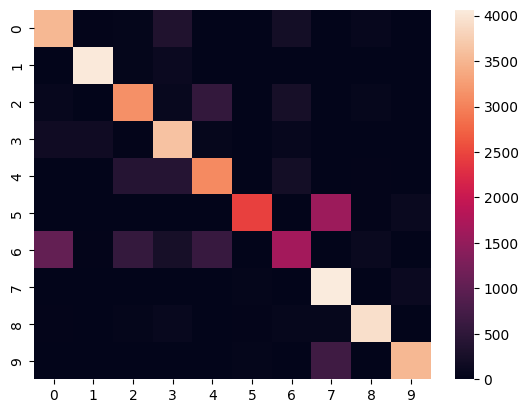

In [ ]:
train_predictedY = get_metrics(model, reg_param, "Training", red_trainX, trainY) # syntax: trainQDA(model, reg_param, string, trainX, trainY)

Validation metrics for QDA...
Validation Classification Report for reg_param = 0.05
              precision    recall  f1-score   support

           0       0.73      0.83      0.78      1407
           1       0.95      0.95      0.95      1419
           2       0.75      0.76      0.76      1396
           3       0.73      0.88      0.80      1378
           4       0.69      0.72      0.70      1413
           5       0.96      0.60      0.73      1410
           6       0.66      0.40      0.50      1439
           7       0.64      0.97      0.77      1374
           8       0.93      0.92      0.93      1379
           9       0.94      0.84      0.89      1385

    accuracy                           0.78     14000
   macro avg       0.80      0.79      0.78     14000
weighted avg       0.80      0.78      0.78     14000

Validation Confusion Matrix:


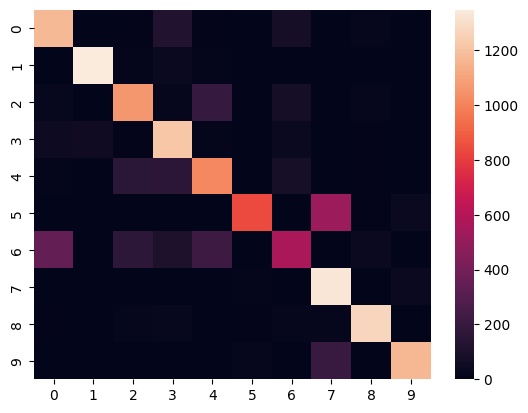

In [ ]:
valid_predictedY = get_metrics(model, reg_param, "Validation", red_validX, validY)

Class label:  0


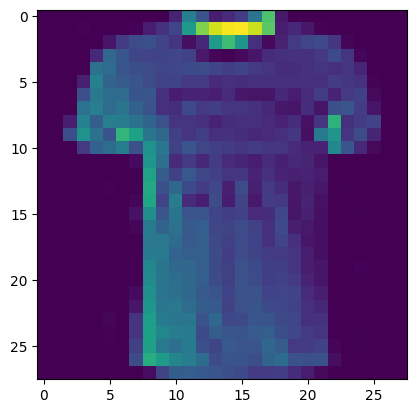

In [ ]:
# image visualization -- Original!
print("Class label: ", trainY[1])
original = trainX[1].reshape(28, 28, 1)
plt.imshow(original) # for actual gray scale version --> plt.imshow(original, cmap='gray')
plt.savefig('original.png')
plt.show()

Class label:  0


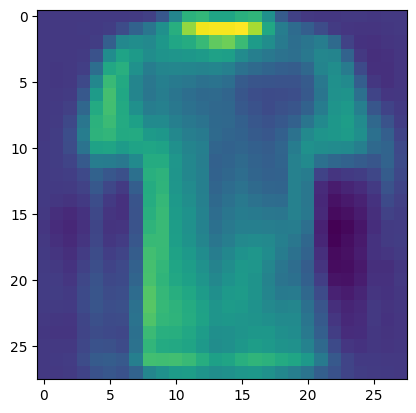

In [ ]:
# image visualization -- Reduced Dimensionality!
print("Class label: ", trainY[1])
out = pca.inverse_transform(red_trainX[1])
out = out.reshape((28, 28, 1))
plt.imshow(out)
plt.savefig('pca.png')
plt.show()

# <font color= 'blue'> Experiment 2: Percent of Explained Variance in PCA

### 0.80 (from previous experiments), 0.65, 0.75, 0.90, 0.95
This experiment showed the biggest effect on results of nearly the entire project. Best model had cumulative explained variance of 90% from 84 components of 784 total.

## 0.65 cumulative explained variance
## val accuracy: 72%
Using PCA with QDA



In [ ]:
# Use PCA
trainX, validX, testX, trainY, validY, testY = un_concatenate(X, Y, u_print=False)
print("Original Image Shape:", trainX[0].shape) # number of columns that the first image has

print()
print('Now using PCA dimensionality reduction...')
# create a PCA model with two components

pca = PCA(n_components = 0.65)
# transform the data
start = time.time()
A = pca.fit_transform(X)
end = time.time()
print('PCA finished in', end - start, 'seconds')
print()
print("Cummulative explained variance ratio: ", sum(pca.explained_variance_ratio_))
print("Reduced Dimensionality Image Shape: ", A[0].shape)
print()
red_trainX, red_validX, red_testX, trainY, validY, testY = un_concatenate(A, Y)

reg_param = 0.05
model = train_QDA(reg_param, red_trainX, trainY) # syntax: trainQDA(reg_param, trainX, trainY)

Original Image Shape: (784,)

Now using PCA dimensionality reduction...
PCA finished in 20.114349365234375 seconds

Cummulative explained variance ratio:  0.6507285089967931
Reduced Dimensionality Image Shape:  (6,)

After train test split: 
Train:  (42000, 6)
Valid:  (14000, 6)
Test:  (14000, 6)

Now training QDA...
QDA training is finished after 0.033606529235839844 seconds



Training metrics for QDA...
Training Classification Report for reg_param = 0.05
              precision    recall  f1-score   support

           0       0.73      0.79      0.76      4237
           1       0.89      0.88      0.89      4228
           2       0.53      0.65      0.58      4167
           3       0.66      0.79      0.72      4135
           4       0.58      0.59      0.58      4150
           5       0.85      0.67      0.75      4175
           6       0.37      0.18      0.24      4215
           7       0.71      0.92      0.80      4230
           8       0.91      0.90      0.90      4230
           9       0.88      0.84      0.86      4233

    accuracy                           0.72     42000
   macro avg       0.71      0.72      0.71     42000
weighted avg       0.71      0.72      0.71     42000

Training Confusion Matrix:


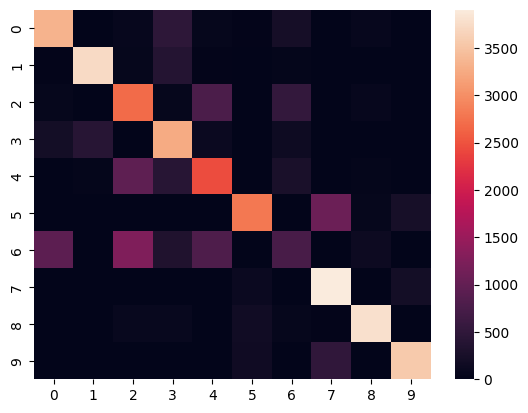

In [ ]:
train_predictedY = get_metrics(model, reg_param, "Training", red_trainX, trainY) # syntax: trainQDA(model, reg_param, string, trainX, trainY)

Validation metrics for QDA...
Validation Classification Report for reg_param = 0.05
              precision    recall  f1-score   support

           0       0.73      0.81      0.77      1407
           1       0.88      0.88      0.88      1419
           2       0.53      0.64      0.58      1396
           3       0.65      0.78      0.71      1378
           4       0.57      0.57      0.57      1413
           5       0.85      0.66      0.74      1410
           6       0.41      0.19      0.26      1439
           7       0.70      0.93      0.80      1374
           8       0.90      0.89      0.89      1379
           9       0.90      0.84      0.87      1385

    accuracy                           0.72     14000
   macro avg       0.71      0.72      0.71     14000
weighted avg       0.71      0.72      0.71     14000

Validation Confusion Matrix:


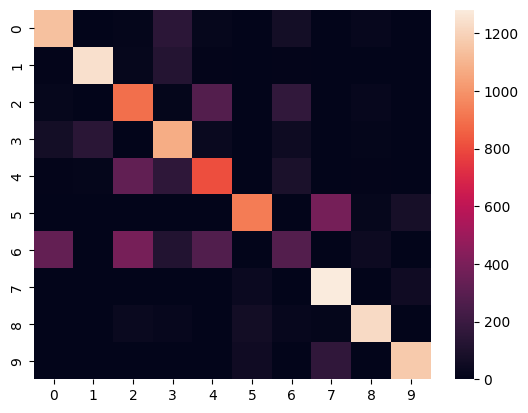

In [ ]:
valid_predictedY = get_metrics(model, reg_param, "Validation", red_validX, validY)

### image visualization

Class label:  0


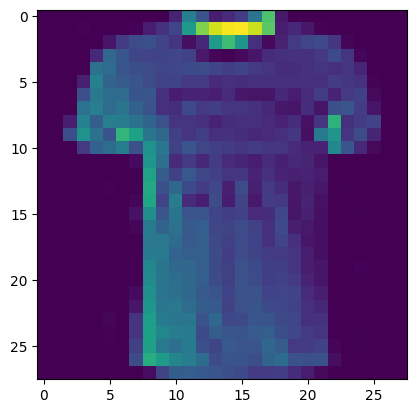

In [ ]:
# image visualization -- Original!
print("Class label: ", trainY[1])
original = trainX[1].reshape(28, 28, 1)
plt.imshow(original) # for actual gray scale version --> plt.imshow(original, cmap='gray')
plt.savefig('original.png')
plt.show()

Class label:  0


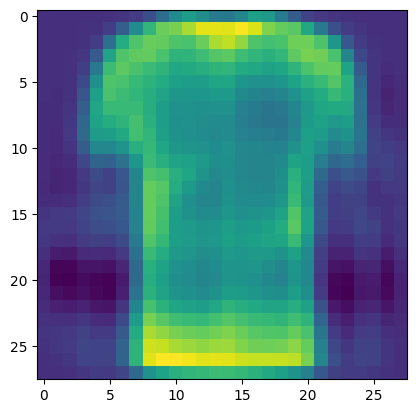

In [ ]:
# image visualization -- Reduced Dimensionality!
print("Class label: ", trainY[1])
out = pca.inverse_transform(red_trainX[1])
out = out.reshape((28, 28, 1))
plt.imshow(out)
plt.savefig('pca.png')
plt.show()

## 0.75 cumulative explained variance
## val accuracy: 76%
Using PCA with QDA



In [ ]:
# Use PCA
trainX, validX, testX, trainY, validY, testY = un_concatenate(X, Y, u_print=False)
print("Original Image Shape:", trainX[0].shape) # number of columns that the first image has

print()
print('Now using PCA dimensionality reduction...')
# create a PCA model with two components

pca = PCA(n_components = 0.75)
# transform the data
start = time.time()
A = pca.fit_transform(X)
end = time.time()
print('PCA finished in', end - start, 'seconds')
print()
print("Cummulative explained variance ratio: ", sum(pca.explained_variance_ratio_))
print("Reduced Dimensionality Image Shape: ", A[0].shape)
print()
red_trainX, red_validX, red_testX, trainY, validY, testY = un_concatenate(A, Y)

reg_param = 0.05
model = train_QDA(reg_param, red_trainX, trainY) # syntax: trainQDA(reg_param, trainX, trainY)

Original Image Shape: (784,)

Now using PCA dimensionality reduction...
PCA finished in 25.18872332572937 seconds

Cummulative explained variance ratio:  0.7530641102494916
Reduced Dimensionality Image Shape:  (14,)

After train test split: 
Train:  (42000, 14)
Valid:  (14000, 14)
Test:  (14000, 14)

Now training QDA...
QDA training is finished after 0.03544974327087402 seconds



Training metrics for QDA...
Training Classification Report for reg_param = 0.05
              precision    recall  f1-score   support

           0       0.72      0.81      0.76      4237
           1       0.95      0.95      0.95      4228
           2       0.66      0.72      0.69      4167
           3       0.72      0.86      0.78      4135
           4       0.67      0.67      0.67      4150
           5       0.95      0.61      0.75      4175
           6       0.61      0.36      0.45      4215
           7       0.65      0.96      0.78      4230
           8       0.92      0.92      0.92      4230
           9       0.92      0.82      0.87      4233

    accuracy                           0.77     42000
   macro avg       0.78      0.77      0.76     42000
weighted avg       0.78      0.77      0.76     42000

Training Confusion Matrix:


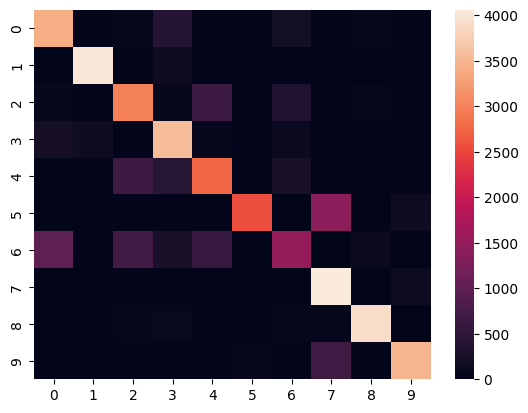

In [ ]:
train_predictedY = get_metrics(model, reg_param, "Training", red_trainX, trainY) # syntax: trainQDA(model, reg_param, string, trainX, trainY)

Validation metrics for QDA...
Validation Classification Report for reg_param = 0.05
              precision    recall  f1-score   support

           0       0.73      0.81      0.77      1407
           1       0.95      0.94      0.95      1419
           2       0.66      0.71      0.68      1396
           3       0.71      0.86      0.78      1378
           4       0.63      0.62      0.63      1413
           5       0.95      0.62      0.75      1410
           6       0.61      0.38      0.47      1439
           7       0.65      0.96      0.78      1374
           8       0.92      0.92      0.92      1379
           9       0.93      0.84      0.88      1385

    accuracy                           0.76     14000
   macro avg       0.77      0.77      0.76     14000
weighted avg       0.77      0.76      0.76     14000

Validation Confusion Matrix:


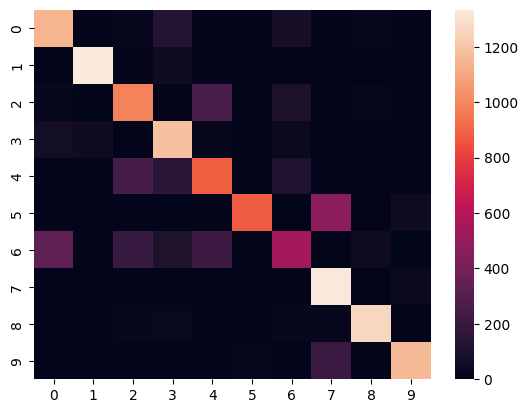

In [ ]:
valid_predictedY = get_metrics(model, reg_param, "Validation", red_validX, validY)

### image visualization

Class label:  0


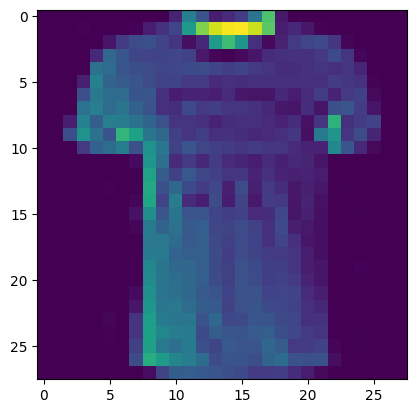

In [ ]:
# image visualization -- Original!
print("Class label: ", trainY[1])
original = trainX[1].reshape(28, 28, 1)
plt.imshow(original) # for actual gray scale version --> plt.imshow(original, cmap='gray')
plt.savefig('original.png')
plt.show()

Class label:  0


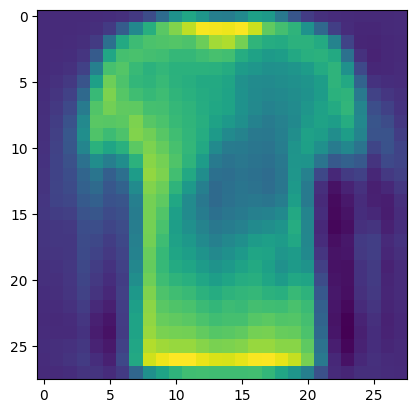

In [ ]:
# image visualization -- Reduced Dimensionality!
print("Class label: ", trainY[1])
out = pca.inverse_transform(red_trainX[1])
out = out.reshape((28, 28, 1))
plt.imshow(out)
plt.savefig('pca.png')
plt.show()

## 0.85 cumulative explained variance
## val accuracy: 80%
Using PCA with QDA


In [ ]:
# Use PCA
trainX, validX, testX, trainY, validY, testY = un_concatenate(X, Y, u_print=False)
print("Original Image Shape:", trainX[0].shape) # number of columns that the first image has

print()
print('Now using PCA dimensionality reduction...')
# create a PCA model with two components

pca = PCA(n_components = 0.85)
# transform the data
start = time.time()
A = pca.fit_transform(X)
end = time.time()
print('PCA finished in', end - start, 'seconds')
print()
print("Cummulative explained variance ratio: ", sum(pca.explained_variance_ratio_))
print("Reduced Dimensionality Image Shape: ", A[0].shape)
print()
red_trainX, red_validX, red_testX, trainY, validY, testY = un_concatenate(A, Y)

reg_param = 0.05
model = train_QDA(reg_param, red_trainX, trainY) # syntax: trainQDA(reg_param, trainX, trainY)

Original Image Shape: (784,)

Now using PCA dimensionality reduction...
PCA finished in 19.617391347885132 seconds

Cummulative explained variance ratio:  0.8507941476827809
Reduced Dimensionality Image Shape:  (43,)

After train test split: 
Train:  (42000, 43)
Valid:  (14000, 43)
Test:  (14000, 43)

Now training QDA...
QDA training is finished after 0.15205597877502441 seconds



Training metrics for QDA...
Training Classification Report for reg_param = 0.05
              precision    recall  f1-score   support

           0       0.74      0.84      0.79      4237
           1       0.94      0.97      0.95      4228
           2       0.77      0.75      0.76      4167
           3       0.75      0.89      0.82      4135
           4       0.70      0.78      0.74      4150
           5       0.97      0.63      0.76      4175
           6       0.70      0.39      0.50      4215
           7       0.66      0.96      0.78      4230
           8       0.94      0.94      0.94      4230
           9       0.94      0.84      0.89      4233

    accuracy                           0.80     42000
   macro avg       0.81      0.80      0.79     42000
weighted avg       0.81      0.80      0.79     42000

Training Confusion Matrix:


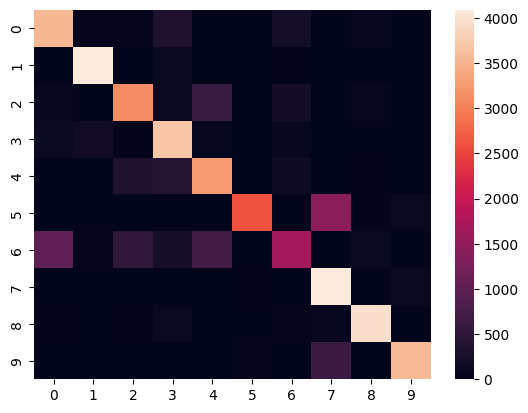

In [ ]:
train_predictedY = get_metrics(model, reg_param, "Training", red_trainX, trainY) # syntax: trainQDA(model, reg_param, string, trainX, trainY)

Validation metrics for QDA...
Validation Classification Report for reg_param = 0.05
              precision    recall  f1-score   support

           0       0.74      0.83      0.78      1407
           1       0.94      0.96      0.95      1419
           2       0.78      0.76      0.77      1396
           3       0.74      0.89      0.81      1378
           4       0.68      0.76      0.72      1413
           5       0.96      0.62      0.76      1410
           6       0.69      0.40      0.51      1439
           7       0.65      0.97      0.78      1374
           8       0.93      0.93      0.93      1379
           9       0.95      0.85      0.90      1385

    accuracy                           0.80     14000
   macro avg       0.81      0.80      0.79     14000
weighted avg       0.81      0.80      0.79     14000

Validation Confusion Matrix:


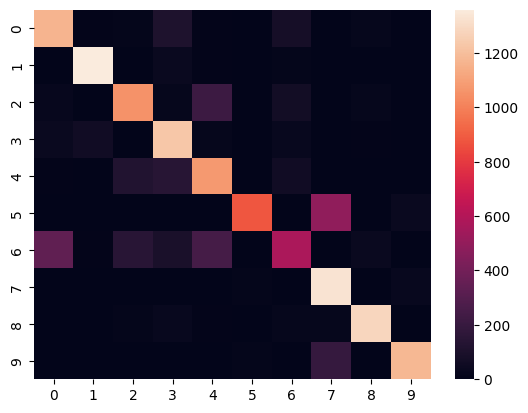

In [ ]:
valid_predictedY = get_metrics(model, reg_param, "Validation", red_validX, validY)

### image visualization

Class label:  0


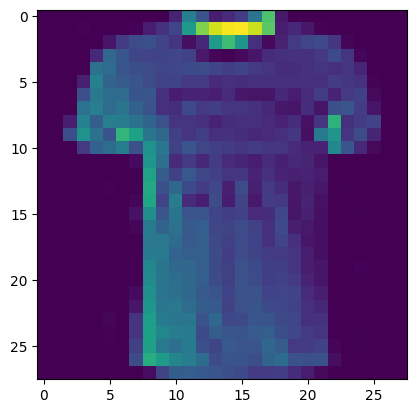

In [ ]:
# image visualization -- Original!
print("Class label: ", trainY[1])
original = trainX[1].reshape(28, 28, 1)
plt.imshow(original) # for actual gray scale version --> plt.imshow(original, cmap='gray')
plt.savefig('original.png')
plt.show()

Class label:  0


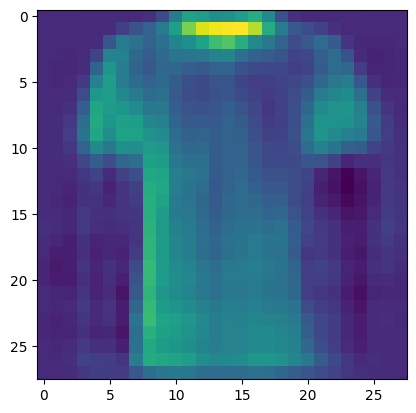

In [ ]:
# image visualization -- Reduced Dimensionality!
print("Class label: ", trainY[1])
out = pca.inverse_transform(red_trainX[1])
out = out.reshape((28, 28, 1))
plt.imshow(out)
plt.savefig('pca.png')
plt.show()

## 0.90 cumulative explained variance
## val accuracy: 81%
Using PCA with QDA

best validation accuracy of 81%

In [ ]:
# Use PCA
trainX, validX, testX, trainY, validY, testY = un_concatenate(X, Y, u_print=False)
print("Original Image Shape:", trainX[0].shape) # number of columns that the first image has

print()
print('Now using PCA dimensionality reduction...')
# create a PCA model with two components

pca = PCA(n_components = 0.90)
# transform the data
start = time.time()
A = pca.fit_transform(X)
end = time.time()
print('PCA finished in', end - start, 'seconds')
print()
print("Cummulative explained variance ratio: ", sum(pca.explained_variance_ratio_))
print("Reduced Dimensionality Image Shape: ", A[0].shape)
print()
red_trainX, red_validX, red_testX, trainY, validY, testY = un_concatenate(A, Y)

reg_param = 0.05
model = train_QDA(reg_param, red_trainX, trainY) # syntax: trainQDA(reg_param, trainX, trainY)

Original Image Shape: (784,)

Now using PCA dimensionality reduction...
PCA finished in 16.686244249343872 seconds

Cummulative explained variance ratio:  0.9005486931904878
Reduced Dimensionality Image Shape:  (84,)

After train test split: 
Train:  (42000, 84)
Valid:  (14000, 84)
Test:  (14000, 84)

Now training QDA...
QDA training is finished after 0.3634164333343506 seconds



Training metrics for QDA...
Training Classification Report for reg_param = 0.05
              precision    recall  f1-score   support

           0       0.76      0.84      0.80      4237
           1       0.94      0.97      0.96      4228
           2       0.79      0.77      0.78      4167
           3       0.76      0.90      0.83      4135
           4       0.70      0.82      0.76      4150
           5       0.98      0.64      0.77      4175
           6       0.74      0.40      0.52      4215
           7       0.67      0.97      0.79      4230
           8       0.94      0.94      0.94      4230
           9       0.95      0.86      0.90      4233

    accuracy                           0.81     42000
   macro avg       0.82      0.81      0.80     42000
weighted avg       0.82      0.81      0.80     42000

Training Confusion Matrix:


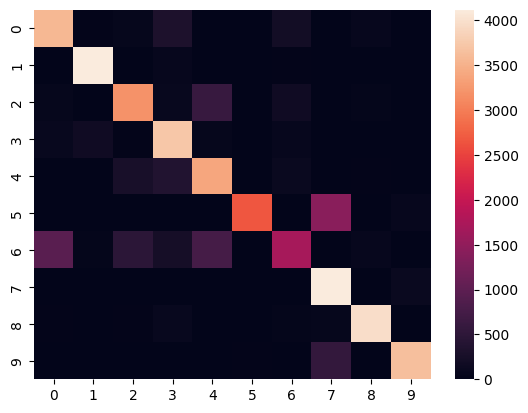

In [ ]:
train_predictedY = get_metrics(model, reg_param, "Training", red_trainX, trainY) # syntax: trainQDA(model, reg_param, string, trainX, trainY)

Validation metrics for QDA...
Validation Classification Report for reg_param = 0.05
              precision    recall  f1-score   support

           0       0.75      0.84      0.79      1407
           1       0.94      0.96      0.95      1419
           2       0.78      0.77      0.78      1396
           3       0.76      0.90      0.82      1378
           4       0.69      0.80      0.74      1413
           5       0.97      0.63      0.77      1410
           6       0.74      0.40      0.52      1439
           7       0.67      0.98      0.79      1374
           8       0.94      0.94      0.94      1379
           9       0.95      0.86      0.91      1385

    accuracy                           0.81     14000
   macro avg       0.82      0.81      0.80     14000
weighted avg       0.82      0.81      0.80     14000

Validation Confusion Matrix:


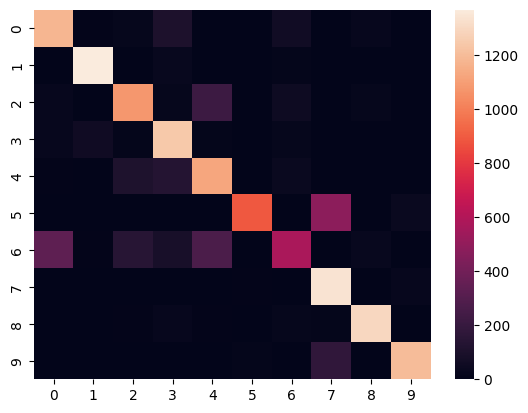

In [ ]:
valid_predictedY = get_metrics(model, reg_param, "Validation", red_validX, validY)

### image visualization

Class label:  0


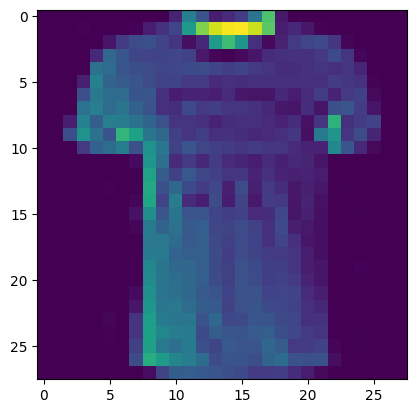

In [ ]:
# image visualization -- Original!
print("Class label: ", trainY[1])
original = trainX[1].reshape(28, 28, 1)
plt.imshow(original) # for actual gray scale version --> plt.imshow(original, cmap='gray')
plt.savefig('original.png')
plt.show()

Class label:  0


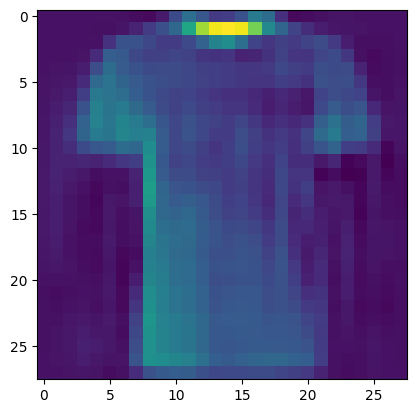

In [ ]:
# image visualization -- Reduced Dimensionality!
print("Class label: ", trainY[1])
out = pca.inverse_transform(red_trainX[1])
out = out.reshape((28, 28, 1))
plt.imshow(out)
plt.savefig('pca.png')
plt.show()

## 0.95 cumulative explained variance
## val accuracy: 80%
Using PCA with QDA



In [ ]:
# Use PCA
trainX, validX, testX, trainY, validY, testY = un_concatenate(X, Y, u_print=False)
print("Original Image Shape:", trainX[0].shape) # number of columns that the first image has

print()
print('Now using PCA dimensionality reduction...')
# create a PCA model with two components

pca = PCA(n_components = 0.95)
# transform the data
start = time.time()
A = pca.fit_transform(X)
end = time.time()
print('PCA finished in', end - start, 'seconds')
print()
print("Cummulative explained variance ratio: ", sum(pca.explained_variance_ratio_))
print("Reduced Dimensionality Image Shape: ", A[0].shape)
print()
red_trainX, red_validX, red_testX, trainY, validY, testY = un_concatenate(A, Y)

reg_param = 0.05
model = train_QDA(reg_param, red_trainX, trainY) # syntax: trainQDA(reg_param, trainX, trainY)

Original Image Shape: (784,)

Now using PCA dimensionality reduction...
PCA finished in 21.018354415893555 seconds

Cummulative explained variance ratio:  0.9502312102565836
Reduced Dimensionality Image Shape:  (188,)

After train test split: 
Train:  (42000, 188)
Valid:  (14000, 188)
Test:  (14000, 188)

Now training QDA...
QDA training is finished after 1.1533098220825195 seconds



Training metrics for QDA...
Training Classification Report for reg_param = 0.05
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      4237
           1       0.92      0.98      0.95      4228
           2       0.80      0.79      0.80      4167
           3       0.78      0.90      0.84      4135
           4       0.69      0.85      0.76      4150
           5       0.99      0.61      0.76      4175
           6       0.78      0.38      0.51      4215
           7       0.66      0.98      0.79      4230
           8       0.96      0.94      0.95      4230
           9       0.96      0.87      0.91      4233

    accuracy                           0.81     42000
   macro avg       0.83      0.81      0.81     42000
weighted avg       0.83      0.81      0.81     42000

Training Confusion Matrix:


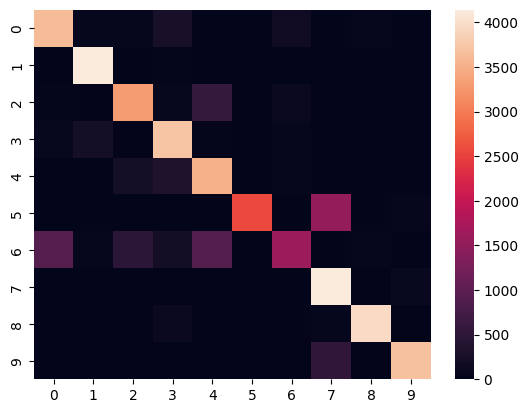

In [ ]:
train_predictedY = get_metrics(model, reg_param, "Training", red_trainX, trainY) # syntax: trainQDA(model, reg_param, string, trainX, trainY)

Validation metrics for QDA...
Validation Classification Report for reg_param = 0.05
              precision    recall  f1-score   support

           0       0.76      0.84      0.79      1407
           1       0.92      0.97      0.94      1419
           2       0.78      0.79      0.78      1396
           3       0.77      0.89      0.82      1378
           4       0.67      0.82      0.74      1413
           5       0.98      0.59      0.74      1410
           6       0.77      0.37      0.50      1439
           7       0.65      0.98      0.78      1374
           8       0.95      0.93      0.94      1379
           9       0.96      0.87      0.91      1385

    accuracy                           0.80     14000
   macro avg       0.82      0.80      0.80     14000
weighted avg       0.82      0.80      0.79     14000

Validation Confusion Matrix:


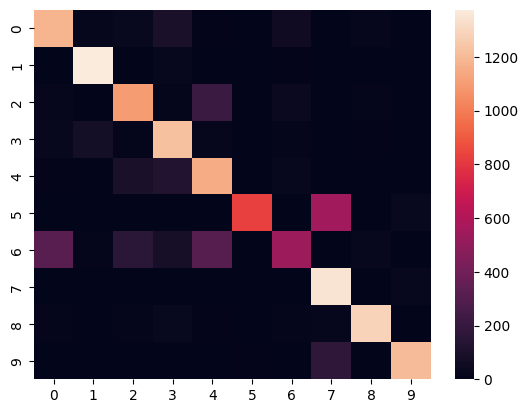

In [ ]:
valid_predictedY = get_metrics(model, reg_param, "Validation", red_validX, validY)

### image visualization

Class label:  0


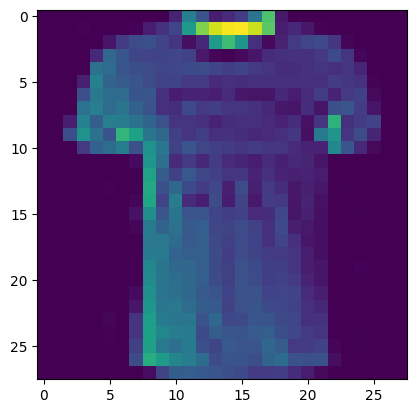

In [ ]:
# image visualization -- Original!
print("Class label: ", trainY[1])
original = trainX[1].reshape(28, 28, 1)
plt.imshow(original) # for actual gray scale version --> plt.imshow(original, cmap='gray')
plt.savefig('original.png')
plt.show()

Class label:  0


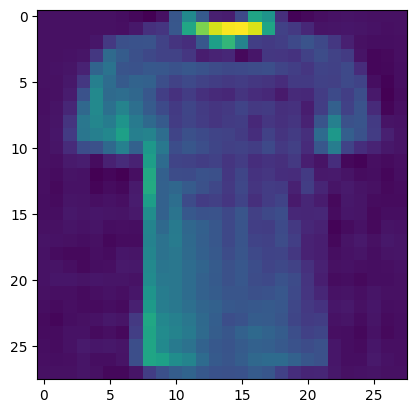

In [ ]:
# image visualization -- Reduced Dimensionality!
print("Class label: ", trainY[1])
out = pca.inverse_transform(red_trainX[1])
out = out.reshape((28, 28, 1))
plt.imshow(out)
plt.savefig('pca.png')
plt.show()

# <font color= 'blue'> Experiment 3: Using Incremental PCA

## 0.90 variance: 200 batch size
There was no signficant different between the best model from the last experiment, but still decided to try different batch sizes in next experiment

## Incremental PCA
## val accuracy: 81%
with QDA

### 0.90 cumulative explained variance
### 200 batch size

Text(0.5, 1.0, 'Incremental: Per Component and Cumulative Explained Variance')

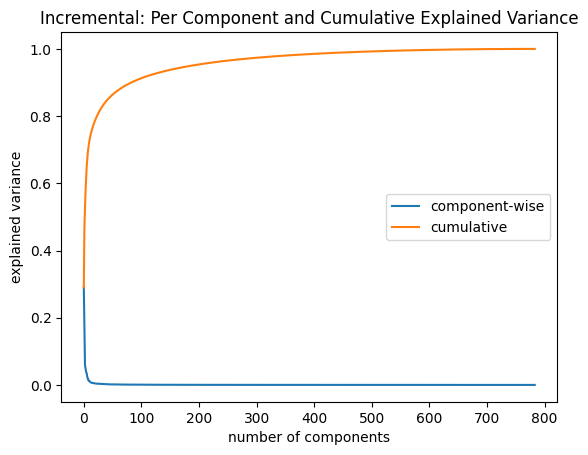

In [ ]:
incr_pca_gen = IncrementalPCA().fit(X)
plt.xlabel('number of components')
plt.ylabel('explained variance')
line1, = plt.plot(range(784), incr_pca_gen.explained_variance_ratio_, label='component-wise') # the line1, thing means some kind of unpack/packing thing
line2, = plt.plot(range(784), np.cumsum(incr_pca_gen.explained_variance_ratio_), label='cumulative')
plt.legend(handles=[line1, line2])
plt.title("Incremental: Per Component and Cumulative Explained Variance") # ONLY ABLE TO SPECIFY NUMBER OF COMPONENTS NOT CUMULATIVE EXPLAINED VARIANCE RATIO

Calculating number of components needed to achieve a certain percentage of cumulative explained variance ratio
- (Incremental PCA function documentation for sklearn doesn't allow direct input for ratio like in normal PCA function)

In [ ]:
cumsum = np.cumsum(incr_pca_gen.explained_variance_ratio_)
d = np.argmax(cumsum >=0.90) + 1

print("Number of components to preserve specified variance:", d) # Print the number of dimentions required to preserve 90% of variance

Number of components to preserve specified variance: 84


In [ ]:
# create an incremental PCA
incr_pca = IncrementalPCA(n_components=d, batch_size=200) # per documentation, cannot treat n_components as explained variance parameter
# transform the data
A = incr_pca.fit_transform(X)
print("Cummulative explained variance ratio: ", sum(incr_pca.explained_variance_ratio_))
print("Reduced Dimensionality Shape: ", A[0].shape)

Cummulative explained variance ratio:  0.8995669149509505
Reduced Dimensionality Shape:  (84,)


In [ ]:
u_batch_size = 200

In [ ]:
# Use PCA
trainX, validX, testX, trainY, validY, testY = un_concatenate(X, Y, u_print=False)
print("Original Image Shape:", trainX[0].shape)
print()
print('Now using Incremental PCA dimensionality reduction...')

# create an incremental PCA
incr_pca = IncrementalPCA(n_components=d, batch_size=u_batch_size) # per documentation, cannot treat n_components as explained variance parameter
# transform the data
start = time.time()
A = incr_pca.fit_transform(X)
end = time.time()
print('Incremental PCA finished in', end - start, 'seconds')
print()
print("Cummulative explained variance ratio: ", sum(incr_pca.explained_variance_ratio_))
print("Reduced Dimensionality Image Shape: ", A[0].shape)
print()
red_trainX, red_validX, red_testX, trainY, validY, testY = un_concatenate(A, Y)

reg_param = 0.05
model = train_QDA(reg_param, red_trainX, trainY) # syntax: trainQDA(reg_param, trainX, trainY)

Original Image Shape: (784,)

Now using Incremental PCA dimensionality reduction...
Incremental PCA finished in 27.63027310371399 seconds

Cummulative explained variance ratio:  0.8995669149509505
Reduced Dimensionality Image Shape:  (84,)

After train test split: 
Train:  (42000, 84)
Valid:  (14000, 84)
Test:  (14000, 84)

Now training QDA...
QDA training is finished after 0.38390278816223145 seconds



Training metrics for QDA...
Training Classification Report for reg_param = 0.05
              precision    recall  f1-score   support

           0       0.76      0.84      0.80      4237
           1       0.94      0.97      0.96      4228
           2       0.79      0.76      0.78      4167
           3       0.77      0.90      0.83      4135
           4       0.70      0.82      0.75      4150
           5       0.98      0.64      0.77      4175
           6       0.74      0.40      0.52      4215
           7       0.67      0.97      0.79      4230
           8       0.95      0.94      0.94      4230
           9       0.95      0.86      0.90      4233

    accuracy                           0.81     42000
   macro avg       0.82      0.81      0.80     42000
weighted avg       0.82      0.81      0.81     42000

Training Confusion Matrix:


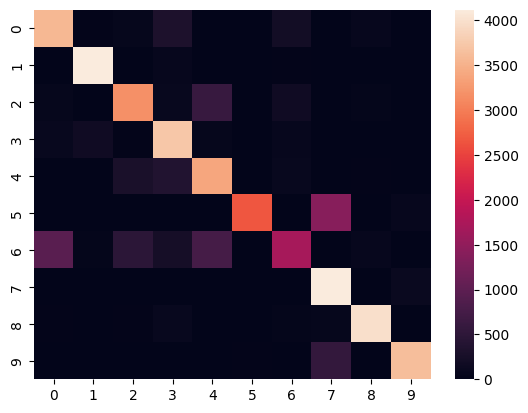

In [ ]:
train_predictedY = get_metrics(model, reg_param, "Training", red_trainX, trainY) # syntax: trainQDA(model, reg_param, string, trainX, trainY)

Validation metrics for QDA...
Validation Classification Report for reg_param = 0.05
              precision    recall  f1-score   support

           0       0.75      0.84      0.79      1407
           1       0.94      0.96      0.95      1419
           2       0.78      0.77      0.78      1396
           3       0.76      0.90      0.82      1378
           4       0.69      0.80      0.74      1413
           5       0.97      0.63      0.76      1410
           6       0.74      0.40      0.52      1439
           7       0.66      0.97      0.79      1374
           8       0.94      0.94      0.94      1379
           9       0.95      0.86      0.91      1385

    accuracy                           0.81     14000
   macro avg       0.82      0.81      0.80     14000
weighted avg       0.82      0.81      0.80     14000

Validation Confusion Matrix:


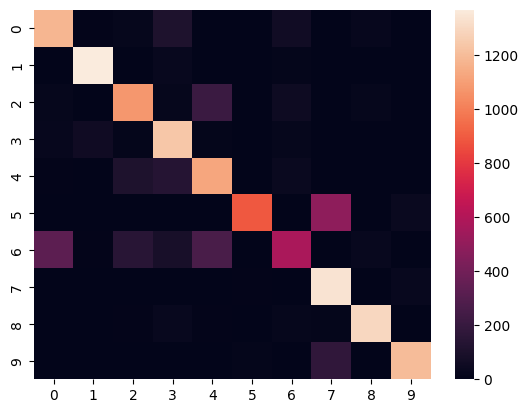

In [ ]:
valid_predictedY = get_metrics(model, reg_param, "Validation", red_validX, validY)

Class label:  0


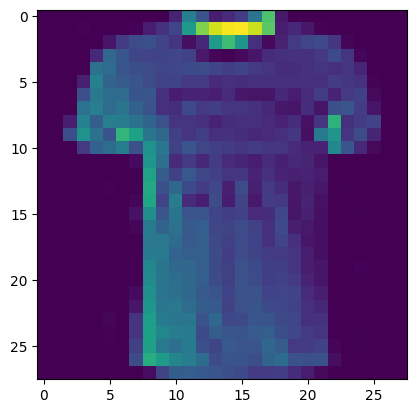

In [ ]:
# image visualization -- Original!
print("Class label: ", trainY[1])
original = trainX[1].reshape(28, 28, 1)
plt.imshow(original) # for actual gray scale version --> plt.imshow(original, cmap='gray')
plt.savefig('original.png')
plt.show()

Class label:  0


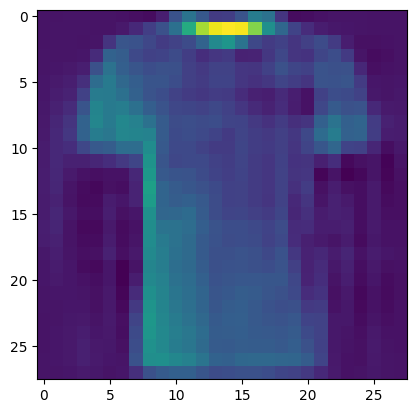

In [ ]:
# image visualization -- Reduced Dimensionality!
print("Class label: ", trainY[1])
out = incr_pca.inverse_transform(red_trainX[1])
out = out.reshape((28, 28, 1))
plt.imshow(out)
plt.savefig('pca.png')
plt.show()

# <font color= 'blue'> Experiment 4: Batch Sizes in Incremental PCA

### 0.90 variance: 200 (from previous experiment), 100, 150
No signficant change in models with different batch sizes observed.

## 100 batch size
## val accuracy: 81%
Using Incremental PCA with QDA
- 0.90 cumulative explained variance

Calculating number of components needed to achieve a certain percentage of cumulative explained variance ratio
- (Incremental PCA function documentation for sklearn doesn't allow direct input for ratio like in normal PCA function)

In [ ]:
cumsum = np.cumsum(incr_pca_gen.explained_variance_ratio_)
d = np.argmax(cumsum >=0.90) + 1

print("Number of components to preserve specified variance:", d) # Print the number of dimentions required to preserve 90% of variance

Number of components to preserve specified variance: 84


In [ ]:
u_batch_size = 100

In [ ]:
# Use PCA
trainX, validX, testX, trainY, validY, testY = un_concatenate(X, Y, u_print=False)
print("Original Image Shape:", trainX[0].shape)
print()
print('Now using Incremental PCA dimensionality reduction...')

# create an incremental PCA
incr_pca = IncrementalPCA(n_components=d, batch_size=u_batch_size) # per documentation, cannot treat n_components as explained variance parameter
# transform the data
start = time.time()
A = incr_pca.fit_transform(X)
end = time.time()
print('Incremental PCA finished in', end - start, 'seconds')
print()
print("Cummulative explained variance ratio: ", sum(incr_pca.explained_variance_ratio_))
print("Reduced Dimensionality Image Shape: ", A[0].shape)
print()
red_trainX, red_validX, red_testX, trainY, validY, testY = un_concatenate(A, Y)

reg_param = 0.05
model = train_QDA(reg_param, red_trainX, trainY) # syntax: trainQDA(reg_param, trainX, trainY)

Original Image Shape: (784,)

Now using Incremental PCA dimensionality reduction...
Incremental PCA finished in 51.668477058410645 seconds

Cummulative explained variance ratio:  0.8994253967668892
Reduced Dimensionality Image Shape:  (84,)

After train test split: 
Train:  (42000, 84)
Valid:  (14000, 84)
Test:  (14000, 84)

Now training QDA...
QDA training is finished after 0.38406825065612793 seconds



Training metrics for QDA...
Training Classification Report for reg_param = 0.05
              precision    recall  f1-score   support

           0       0.76      0.84      0.80      4237
           1       0.94      0.97      0.96      4228
           2       0.79      0.77      0.78      4167
           3       0.76      0.90      0.83      4135
           4       0.70      0.81      0.75      4150
           5       0.98      0.64      0.78      4175
           6       0.74      0.40      0.52      4215
           7       0.67      0.97      0.80      4230
           8       0.94      0.94      0.94      4230
           9       0.95      0.86      0.90      4233

    accuracy                           0.81     42000
   macro avg       0.82      0.81      0.80     42000
weighted avg       0.82      0.81      0.80     42000

Training Confusion Matrix:


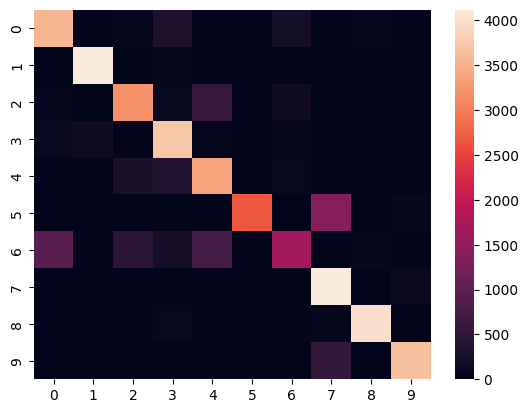

In [ ]:
train_predictedY = get_metrics(model, reg_param, "Training", red_trainX, trainY) # syntax: trainQDA(model, reg_param, string, trainX, trainY)

Validation metrics for QDA...
Validation Classification Report for reg_param = 0.05
              precision    recall  f1-score   support

           0       0.75      0.84      0.79      1407
           1       0.94      0.96      0.95      1419
           2       0.78      0.77      0.78      1396
           3       0.76      0.90      0.82      1378
           4       0.69      0.79      0.74      1413
           5       0.97      0.63      0.77      1410
           6       0.74      0.40      0.52      1439
           7       0.66      0.97      0.79      1374
           8       0.94      0.94      0.94      1379
           9       0.95      0.86      0.91      1385

    accuracy                           0.81     14000
   macro avg       0.82      0.81      0.80     14000
weighted avg       0.82      0.81      0.80     14000

Validation Confusion Matrix:


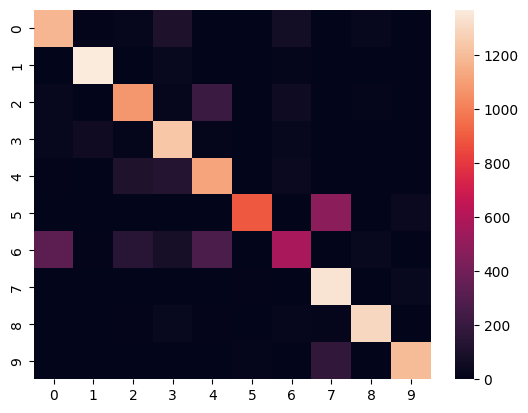

In [ ]:
valid_predictedY = get_metrics(model, reg_param, "Validation", red_validX, validY)

Class label:  0


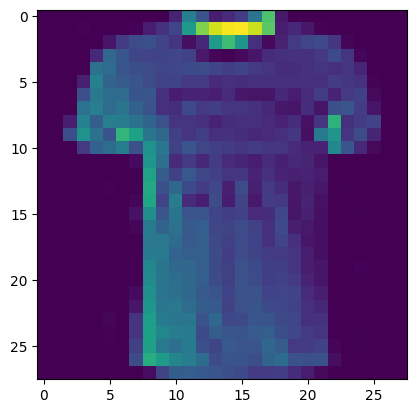

In [ ]:
# image visualization -- Original!
print("Class label: ", trainY[1])
original = trainX[1].reshape(28, 28, 1)
plt.imshow(original) # for actual gray scale version --> plt.imshow(original, cmap='gray')
plt.savefig('original.png')
plt.show()

Class label:  0


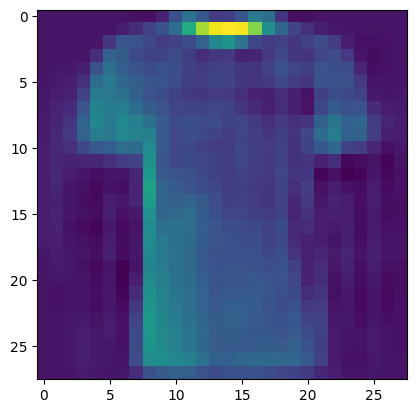

In [ ]:
# image visualization -- Reduced Dimensionality!
print("Class label: ", trainY[1])
out = incr_pca.inverse_transform(red_trainX[1])
out = out.reshape((28, 28, 1))
plt.imshow(out)
plt.savefig('pca.png')
plt.show()

## 150 batch size
## val accuracy: 81%
Using Incremental PCA with QDA
- 0.90 cumulative explained variance

Calculating number of components needed to achieve a certain percentage of cumulative explained variance ratio
- (Incremental PCA function documentation for sklearn doesn't allow direct input for ratio like in normal PCA function)

In [ ]:
cumsum = np.cumsum(incr_pca_gen.explained_variance_ratio_)
d = np.argmax(cumsum >=0.90) + 1

print("Number of components to preserve specified variance:", d) # Print the number of dimentions required to preserve 90% of variance

Number of components to preserve specified variance: 84


In [ ]:
# create an incremental PCA
incr_pca = IncrementalPCA(n_components=d, batch_size=200) # per documentation, cannot treat n_components as explained variance parameter
# transform the data
A = incr_pca.fit_transform(X)
print("Cummulative explained variance ratio: ", sum(incr_pca.explained_variance_ratio_))
print("Reduced Dimensionality Shape: ", A[0].shape)

Cummulative explained variance ratio:  0.8995669149509505
Reduced Dimensionality Shape:  (84,)


In [ ]:
u_batch_size = 150

In [ ]:
# Use PCA
trainX, validX, testX, trainY, validY, testY = un_concatenate(X, Y, u_print=False)
print("Original Image Shape:", trainX[0].shape)
print()
print('Now using Incremental PCA dimensionality reduction...')

# create an incremental PCA
incr_pca = IncrementalPCA(n_components=d, batch_size=u_batch_size) # per documentation, cannot treat n_components as explained variance parameter
# transform the data
start = time.time()
A = incr_pca.fit_transform(X)
end = time.time()
print('Incremental PCA finished in', end - start, 'seconds')
print()
print("Cummulative explained variance ratio: ", sum(incr_pca.explained_variance_ratio_))
print("Reduced Dimensionality Image Shape: ", A[0].shape)
print()
red_trainX, red_validX, red_testX, trainY, validY, testY = un_concatenate(A, Y)

reg_param = 0.05
model = train_QDA(reg_param, red_trainX, trainY) # syntax: trainQDA(reg_param, trainX, trainY)

Original Image Shape: (784,)

Now using Incremental PCA dimensionality reduction...
Incremental PCA finished in 26.513057947158813 seconds

Cummulative explained variance ratio:  0.8994228162002511
Reduced Dimensionality Image Shape:  (84,)

After train test split: 
Train:  (42000, 84)
Valid:  (14000, 84)
Test:  (14000, 84)

Now training QDA...
QDA training is finished after 0.3944532871246338 seconds



Training metrics for QDA...
Training Classification Report for reg_param = 0.05
              precision    recall  f1-score   support

           0       0.76      0.84      0.80      4237
           1       0.94      0.97      0.96      4228
           2       0.79      0.77      0.78      4167
           3       0.77      0.90      0.83      4135
           4       0.70      0.82      0.75      4150
           5       0.98      0.64      0.78      4175
           6       0.74      0.40      0.52      4215
           7       0.67      0.97      0.79      4230
           8       0.94      0.94      0.94      4230
           9       0.95      0.86      0.90      4233

    accuracy                           0.81     42000
   macro avg       0.82      0.81      0.80     42000
weighted avg       0.82      0.81      0.80     42000

Training Confusion Matrix:


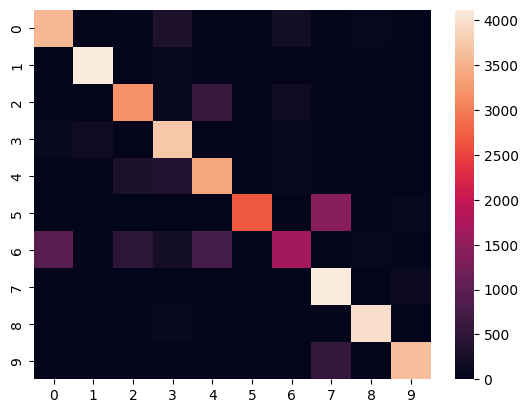

In [ ]:
train_predictedY = get_metrics(model, reg_param, "Training", red_trainX, trainY) # syntax: trainQDA(model, reg_param, string, trainX, trainY)

Validation metrics for QDA...
Validation Classification Report for reg_param = 0.05
              precision    recall  f1-score   support

           0       0.75      0.84      0.79      1407
           1       0.94      0.96      0.95      1419
           2       0.78      0.77      0.78      1396
           3       0.76      0.90      0.82      1378
           4       0.69      0.79      0.74      1413
           5       0.97      0.63      0.76      1410
           6       0.74      0.40      0.52      1439
           7       0.66      0.97      0.79      1374
           8       0.94      0.94      0.94      1379
           9       0.95      0.86      0.90      1385

    accuracy                           0.81     14000
   macro avg       0.82      0.81      0.80     14000
weighted avg       0.82      0.81      0.80     14000

Validation Confusion Matrix:


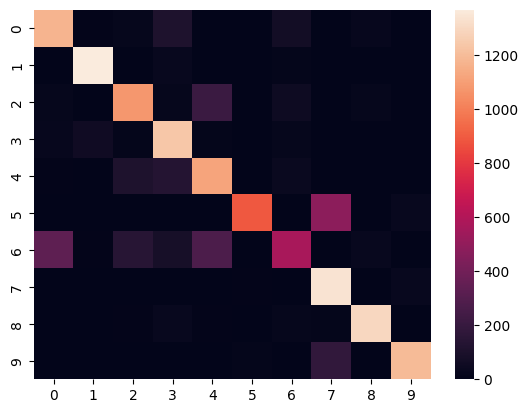

In [ ]:
valid_predictedY = get_metrics(model, reg_param, "Validation", red_validX, validY)

Class label:  0


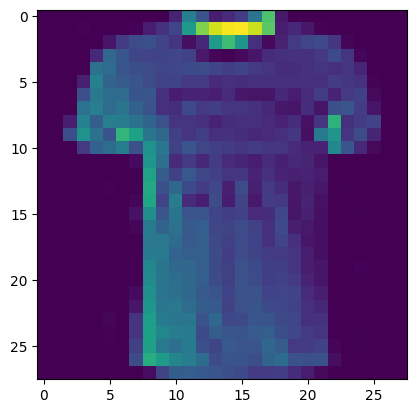

In [ ]:
# image visualization -- Original!
print("Class label: ", trainY[1])
original = trainX[1].reshape(28, 28, 1)
plt.imshow(original) # for actual gray scale version --> plt.imshow(original, cmap='gray')
plt.savefig('original.png')
plt.show()

Class label:  0


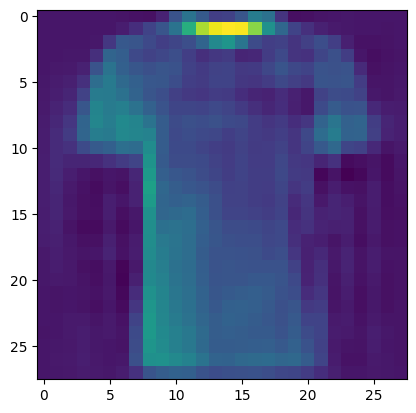

In [ ]:
# image visualization -- Reduced Dimensionality!
print("Class label: ", trainY[1])
out = incr_pca.inverse_transform(red_trainX[1])
out = out.reshape((28, 28, 1))
plt.imshow(out)
plt.savefig('pca.png')
plt.show()

# <font color= 'blue'> Experiment 5: Using Sparse PCA
## val accuracy: 80%
with QDA

### 0.90 cumulative explained variance
### 150 batch size

Did not continue, transforms of data took too long and there was no significant increase in performance in support of running more models. training runtime was around 16 minutes

In [ ]:
u_batch_size = 150
d = 84

In [ ]:
# Use PCA
trainX, validX, testX, trainY, validY, testY = un_concatenate(X, Y, u_print=False)
print("Original Image Shape:", trainX[0].shape)
print()
print('Now using Sparse PCA dimensionality reduction...')

# create a sparse PCA
spr_pca = SparsePCA(n_components=d, max_iter=200) # per documentation, cannot treat n_components as explained variance parameter
# transform the data
start = time.time()
A = spr_pca.fit_transform(X)
end = time.time()
print('Sparse PCA finished in', end - start, 'seconds')
print()

Original Image Shape: (784,)

Now using Incremental PCA dimensionality reduction...
Incremental PCA finished in 994.6456387042999 seconds



In [ ]:
print("Reduced Dimensionality Image Shape: ", A[0].shape)
print()
red_trainX, red_validX, red_testX, trainY, validY, testY = un_concatenate(A, Y)

reg_param = 0.05
model = train_QDA(reg_param, red_trainX, trainY) # syntax: trainQDA(reg_param, trainX, trainY)

Reduced Dimensionality Image Shape:  (84,)

After train test split: 
Train:  (42000, 84)
Valid:  (14000, 84)
Test:  (14000, 84)

Now training QDA...
QDA training is finished after 0.332714319229126 seconds



Training metrics for QDA...
Training Classification Report for reg_param = 0.05
              precision    recall  f1-score   support

           0       0.76      0.84      0.80      4237
           1       0.93      0.98      0.95      4228
           2       0.79      0.77      0.78      4167
           3       0.77      0.89      0.83      4135
           4       0.71      0.81      0.76      4150
           5       0.98      0.62      0.76      4175
           6       0.73      0.41      0.53      4215
           7       0.66      0.97      0.79      4230
           8       0.95      0.93      0.94      4230
           9       0.95      0.87      0.91      4233

    accuracy                           0.81     42000
   macro avg       0.82      0.81      0.80     42000
weighted avg       0.82      0.81      0.80     42000

Training Confusion Matrix:


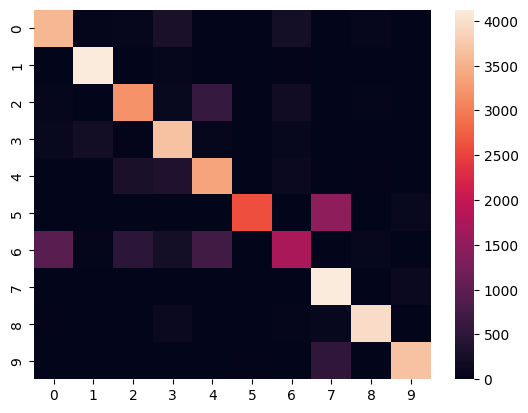

In [ ]:
train_predictedY = get_metrics(model, reg_param, "Training", red_trainX, trainY) # syntax: trainQDA(model, reg_param, string, trainX, trainY)

Validation metrics for QDA...
Validation Classification Report for reg_param = 0.05
              precision    recall  f1-score   support

           0       0.75      0.84      0.79      1407
           1       0.93      0.97      0.95      1419
           2       0.78      0.77      0.77      1396
           3       0.76      0.89      0.82      1378
           4       0.69      0.79      0.74      1413
           5       0.97      0.61      0.75      1410
           6       0.75      0.40      0.52      1439
           7       0.65      0.98      0.78      1374
           8       0.93      0.93      0.93      1379
           9       0.95      0.87      0.91      1385

    accuracy                           0.80     14000
   macro avg       0.82      0.80      0.80     14000
weighted avg       0.82      0.80      0.79     14000

Validation Confusion Matrix:


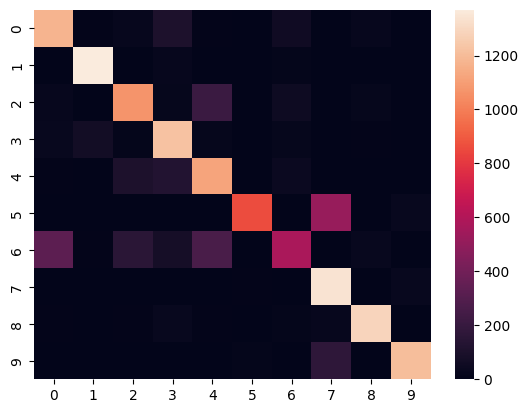

In [ ]:
valid_predictedY = get_metrics(model, reg_param, "Validation", red_validX, validY)

### image visualization

Class label:  0


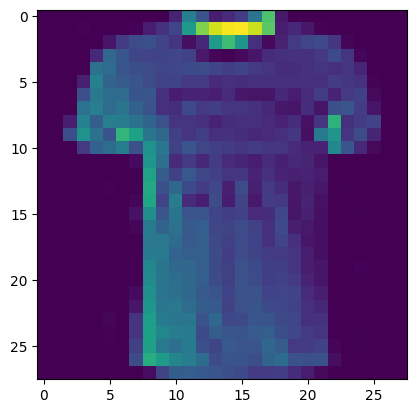

In [ ]:
# image visualization -- Original!
print("Class label: ", trainY[1])
original = trainX[1].reshape(28, 28, 1)
plt.imshow(original) # for actual gray scale version --> plt.imshow(original, cmap='gray')
plt.savefig('original.png')
plt.show()

In [ ]:
# extra code because this was run at a later session
print("Original Image Shape:", X[0].shape)
A = spr_pca.transform(X)
print("Reduced Dimensionality Image Shape:", A[0].shape)
#trainX, validX, testX, trainY, validY, testY = un_concatenate(A, Y, u_print=False)

Original Image Shape: (784,)
Reduced Dimensionality Image Shape: (84,)


Class label:  0


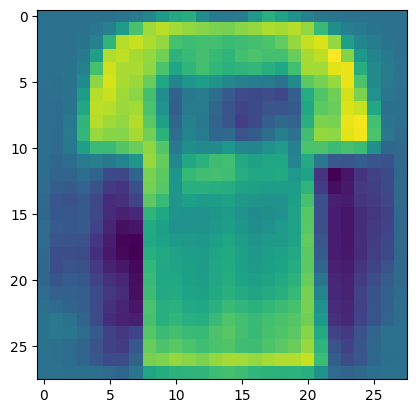

In [ ]:
# image visualization -- Reduced Dimensionality!
print("Class label: ", trainY[1])
inverse = np.dot(A, spr_pca.components_)
#out = spr_pca.inverse_transform(red_trainX[1])
out = inverse[1].reshape((28, 28, 1))
plt.imshow(out)
plt.savefig('pca.png')
plt.show()

# <font color= 'blue'> [Failed] Experiment: Using Kernel PCA
unable to use kernel pca with large dataset, occupies too much memory. Could technically attempt do kernel pca in batches, but decided to move onto next experiment instead. It would cost too much necessary runtime regardless.

In [ ]:
print(X[0].shape) # number of columns that the first image has

(784,)


In [ ]:
# create a kernel PCA model with two components
kernel_pca = KernelPCA(n_components=100, kernel="rbf", gamma=10) # alpha only for fit_inverse_transform

# transform the data
A = kernel_pca.fit_transform(X)
#print("Cummulative explained variance ratio: ", sum(pca.explained_variance_ratio_))
print("Reduced Dimensionality Shape: ", A.shape)

In [ ]:
print(A[0].shape) # number of columns that the first image has

# <font color= 'blue'> Experiment 6: Regularizer Parameter in QDA
### PCA with 0.90 explained variance; 0.07, 0.02, 0.09, 0.005, 0.05 (from previous experiments)
noticed F1-Score for class 6 changes with the different regularizer parameters. (Decreases with lower regularization). otherwise, mostly no obvious effect on accuracy / F1-scores. Kept 0.05 as regularizer parameter.

## 0.07 reg_param
## val accuracy: 81%
Using PCA (0.90 explained variance) with QDA

In [ ]:
reg_param = 0.07

In [ ]:
# Use PCA
trainX, validX, testX, trainY, validY, testY = un_concatenate(X, Y, u_print=False)
print("Original Image Shape:", trainX[0].shape) # number of columns that the first image has

print()
print('Now using PCA dimensionality reduction...')
# create a PCA model with two components

pca = PCA(n_components = 0.90)
# transform the data
start = time.time()
A = pca.fit_transform(X)
end = time.time()
print('PCA finished in', end - start, 'seconds')
print()
print("Cummulative explained variance ratio: ", sum(pca.explained_variance_ratio_))
print("Reduced Dimensionality Image Shape: ", A[0].shape)
print()
red_trainX, red_validX, red_testX, trainY, validY, testY = un_concatenate(A, Y)

model = train_QDA(reg_param, red_trainX, trainY) # syntax: trainQDA(reg_param, trainX, trainY)

Original Image Shape: (784,)

Now using PCA dimensionality reduction...
PCA finished in 16.44734525680542 seconds

Cummulative explained variance ratio:  0.9005486931904878
Reduced Dimensionality Image Shape:  (84,)

After train test split: 
Train:  (42000, 84)
Valid:  (14000, 84)
Test:  (14000, 84)

Now training QDA...
QDA training is finished after 0.3869922161102295 seconds



Training metrics for QDA...
Training Classification Report for reg_param = 0.07
              precision    recall  f1-score   support

           0       0.75      0.84      0.80      4237
           1       0.94      0.97      0.96      4228
           2       0.79      0.76      0.78      4167
           3       0.77      0.90      0.83      4135
           4       0.71      0.81      0.76      4150
           5       0.98      0.63      0.77      4175
           6       0.74      0.41      0.53      4215
           7       0.67      0.97      0.79      4230
           8       0.95      0.94      0.94      4230
           9       0.95      0.86      0.90      4233

    accuracy                           0.81     42000
   macro avg       0.82      0.81      0.80     42000
weighted avg       0.82      0.81      0.80     42000

Training Confusion Matrix:


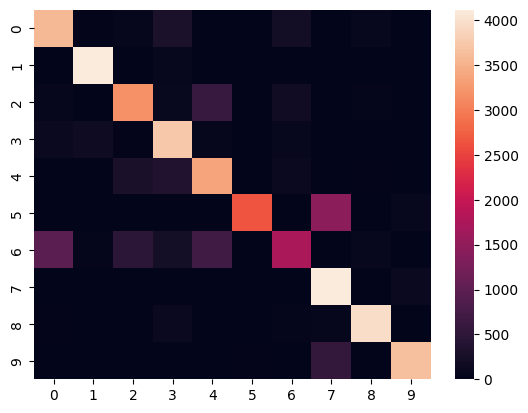

In [ ]:
train_predictedY = get_metrics(model, reg_param, "Training", red_trainX, trainY) # syntax: trainQDA(model, reg_param, string, trainX, trainY)

Validation metrics for QDA...
Validation Classification Report for reg_param = 0.07
              precision    recall  f1-score   support

           0       0.74      0.84      0.79      1407
           1       0.95      0.96      0.96      1419
           2       0.78      0.76      0.77      1396
           3       0.76      0.90      0.82      1378
           4       0.69      0.79      0.74      1413
           5       0.97      0.63      0.77      1410
           6       0.73      0.41      0.52      1439
           7       0.67      0.98      0.79      1374
           8       0.94      0.94      0.94      1379
           9       0.95      0.87      0.91      1385

    accuracy                           0.81     14000
   macro avg       0.82      0.81      0.80     14000
weighted avg       0.82      0.81      0.80     14000

Validation Confusion Matrix:


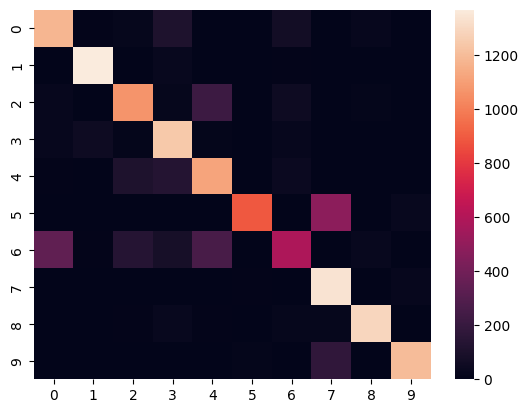

In [ ]:
valid_predictedY = get_metrics(model, reg_param, "Validation", red_validX, validY)

## 0.02 reg_param
## val accuracy: 80%
Using PCA (0.90 explained variance) with QDA

In [ ]:
reg_param = 0.02

In [ ]:
# Use PCA
trainX, validX, testX, trainY, validY, testY = un_concatenate(X, Y, u_print=False)
print("Original Image Shape:", trainX[0].shape) # number of columns that the first image has

print()
print('Now using PCA dimensionality reduction...')
# create a PCA model with two components

pca = PCA(n_components = 0.90)
# transform the data
start = time.time()
A = pca.fit_transform(X)
end = time.time()
print('PCA finished in', end - start, 'seconds')
print()
print("Cummulative explained variance ratio: ", sum(pca.explained_variance_ratio_))
print("Reduced Dimensionality Image Shape: ", A[0].shape)
print()
red_trainX, red_validX, red_testX, trainY, validY, testY = un_concatenate(A, Y)

model = train_QDA(reg_param, red_trainX, trainY) # syntax: trainQDA(reg_param, trainX, trainY)

Original Image Shape: (784,)

Now using PCA dimensionality reduction...
PCA finished in 13.699416875839233 seconds

Cummulative explained variance ratio:  0.9005486931904878
Reduced Dimensionality Image Shape:  (84,)

After train test split: 
Train:  (42000, 84)
Valid:  (14000, 84)
Test:  (14000, 84)

Now training QDA...
QDA training is finished after 0.3244967460632324 seconds



Training metrics for QDA...
Training Classification Report for reg_param = 0.02
              precision    recall  f1-score   support

           0       0.77      0.83      0.80      4237
           1       0.94      0.97      0.95      4228
           2       0.80      0.77      0.78      4167
           3       0.76      0.89      0.82      4135
           4       0.68      0.82      0.75      4150
           5       0.98      0.65      0.78      4175
           6       0.73      0.39      0.50      4215
           7       0.68      0.97      0.80      4230
           8       0.94      0.95      0.94      4230
           9       0.96      0.86      0.90      4233

    accuracy                           0.81     42000
   macro avg       0.82      0.81      0.80     42000
weighted avg       0.82      0.81      0.80     42000

Training Confusion Matrix:


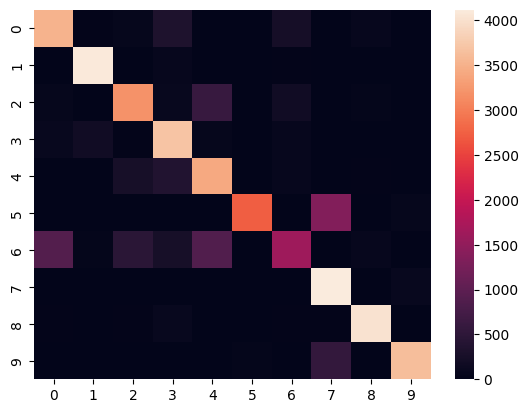

In [ ]:
train_predictedY = get_metrics(model, reg_param, "Training", red_trainX, trainY) # syntax: trainQDA(model, reg_param, string, trainX, trainY)

Validation metrics for QDA...
Validation Classification Report for reg_param = 0.02
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      1407
           1       0.94      0.96      0.95      1419
           2       0.79      0.77      0.78      1396
           3       0.75      0.90      0.82      1378
           4       0.67      0.80      0.73      1413
           5       0.97      0.64      0.77      1410
           6       0.73      0.39      0.50      1439
           7       0.67      0.97      0.79      1374
           8       0.93      0.95      0.94      1379
           9       0.96      0.86      0.90      1385

    accuracy                           0.80     14000
   macro avg       0.82      0.81      0.80     14000
weighted avg       0.82      0.80      0.80     14000

Validation Confusion Matrix:


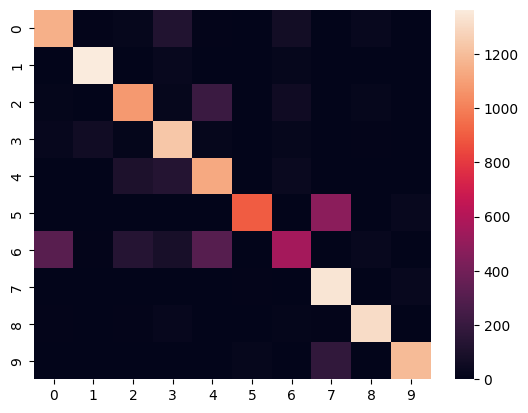

In [ ]:
valid_predictedY = get_metrics(model, reg_param, "Validation", red_validX, validY)

## 0.09 reg_param
## val accuracy: 81%
Using PCA (0.90 explained variance) with QDA

In [ ]:
reg_param = 0.09

In [ ]:
# Use PCA
trainX, validX, testX, trainY, validY, testY = un_concatenate(X, Y, u_print=False)
print("Original Image Shape:", trainX[0].shape) # number of columns that the first image has

print()
print('Now using PCA dimensionality reduction...')
# create a PCA model with two components

pca = PCA(n_components = 0.90)
# transform the data
start = time.time()
A = pca.fit_transform(X)
end = time.time()
print('PCA finished in', end - start, 'seconds')
print()
print("Cummulative explained variance ratio: ", sum(pca.explained_variance_ratio_))
print("Reduced Dimensionality Image Shape: ", A[0].shape)
print()
red_trainX, red_validX, red_testX, trainY, validY, testY = un_concatenate(A, Y)

model = train_QDA(reg_param, red_trainX, trainY) # syntax: trainQDA(reg_param, trainX, trainY)

Original Image Shape: (784,)

Now using PCA dimensionality reduction...
PCA finished in 13.684890985488892 seconds

Cummulative explained variance ratio:  0.9005486931904878
Reduced Dimensionality Image Shape:  (84,)

After train test split: 
Train:  (42000, 84)
Valid:  (14000, 84)
Test:  (14000, 84)

Now training QDA...
QDA training is finished after 0.43027591705322266 seconds



Training metrics for QDA...
Training Classification Report for reg_param = 0.09
              precision    recall  f1-score   support

           0       0.75      0.85      0.80      4237
           1       0.95      0.97      0.96      4228
           2       0.78      0.76      0.77      4167
           3       0.77      0.91      0.83      4135
           4       0.71      0.80      0.75      4150
           5       0.98      0.63      0.77      4175
           6       0.73      0.41      0.53      4215
           7       0.67      0.97      0.79      4230
           8       0.95      0.93      0.94      4230
           9       0.95      0.86      0.90      4233

    accuracy                           0.81     42000
   macro avg       0.82      0.81      0.80     42000
weighted avg       0.82      0.81      0.80     42000

Training Confusion Matrix:


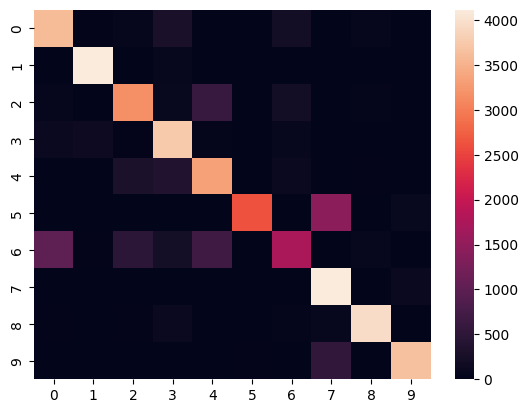

In [ ]:
train_predictedY = get_metrics(model, reg_param, "Training", red_trainX, trainY) # syntax: trainQDA(model, reg_param, string, trainX, trainY)

Validation metrics for QDA...
Validation Classification Report for reg_param = 0.09
              precision    recall  f1-score   support

           0       0.74      0.84      0.79      1407
           1       0.96      0.96      0.96      1419
           2       0.78      0.76      0.77      1396
           3       0.76      0.91      0.83      1378
           4       0.69      0.78      0.73      1413
           5       0.98      0.63      0.77      1410
           6       0.73      0.41      0.52      1439
           7       0.66      0.98      0.79      1374
           8       0.94      0.93      0.94      1379
           9       0.95      0.87      0.91      1385

    accuracy                           0.81     14000
   macro avg       0.82      0.81      0.80     14000
weighted avg       0.82      0.81      0.80     14000

Validation Confusion Matrix:


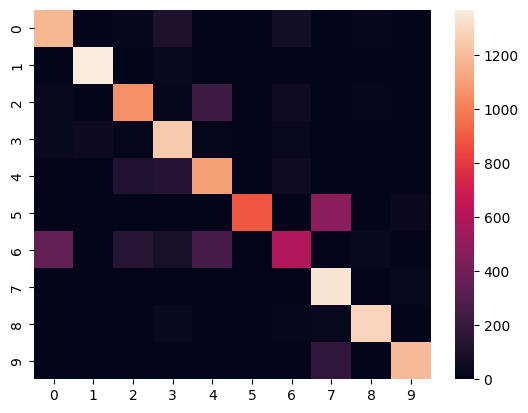

In [ ]:
valid_predictedY = get_metrics(model, reg_param, "Validation", red_validX, validY)

## 0.005 reg_param
## val accuracy: 80%
Using PCA (0.90 explained variance) with QDA

In [ ]:
reg_param = 0.005

In [ ]:
# Use PCA
trainX, validX, testX, trainY, validY, testY = un_concatenate(X, Y, u_print=False)
print("Original Image Shape:", trainX[0].shape) # number of columns that the first image has

print()
print('Now using PCA dimensionality reduction...')
# create a PCA model with two components

pca = PCA(n_components = 0.90)
# transform the data
start = time.time()
A = pca.fit_transform(X)
end = time.time()
print('PCA finished in', end - start, 'seconds')
print()
print("Cummulative explained variance ratio: ", sum(pca.explained_variance_ratio_))
print("Reduced Dimensionality Image Shape: ", A[0].shape)
print()
red_trainX, red_validX, red_testX, trainY, validY, testY = un_concatenate(A, Y)

model = train_QDA(reg_param, red_trainX, trainY) # syntax: trainQDA(reg_param, trainX, trainY)

Original Image Shape: (784,)

Now using PCA dimensionality reduction...
PCA finished in 15.99580430984497 seconds

Cummulative explained variance ratio:  0.9005486931904878
Reduced Dimensionality Image Shape:  (84,)

After train test split: 
Train:  (42000, 84)
Valid:  (14000, 84)
Test:  (14000, 84)

Now training QDA...
QDA training is finished after 0.4291527271270752 seconds



Training metrics for QDA...
Training Classification Report for reg_param = 0.005
              precision    recall  f1-score   support

           0       0.77      0.82      0.79      4237
           1       0.94      0.96      0.95      4228
           2       0.80      0.76      0.78      4167
           3       0.75      0.89      0.81      4135
           4       0.66      0.82      0.73      4150
           5       0.97      0.69      0.80      4175
           6       0.69      0.37      0.48      4215
           7       0.70      0.97      0.81      4230
           8       0.93      0.95      0.94      4230
           9       0.96      0.86      0.91      4233

    accuracy                           0.81     42000
   macro avg       0.82      0.81      0.80     42000
weighted avg       0.82      0.81      0.80     42000

Training Confusion Matrix:


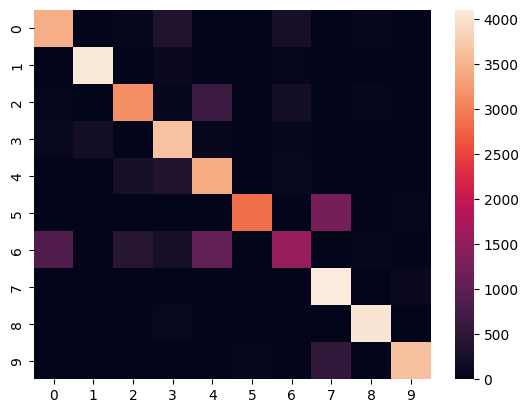

In [ ]:
train_predictedY = get_metrics(model, reg_param, "Training", red_trainX, trainY) # syntax: trainQDA(model, reg_param, string, trainX, trainY)

Validation metrics for QDA...
Validation Classification Report for reg_param = 0.005
              precision    recall  f1-score   support

           0       0.77      0.81      0.78      1407
           1       0.94      0.95      0.95      1419
           2       0.80      0.75      0.77      1396
           3       0.73      0.89      0.80      1378
           4       0.65      0.80      0.71      1413
           5       0.96      0.68      0.80      1410
           6       0.69      0.36      0.48      1439
           7       0.69      0.97      0.81      1374
           8       0.93      0.95      0.94      1379
           9       0.96      0.86      0.91      1385

    accuracy                           0.80     14000
   macro avg       0.81      0.80      0.80     14000
weighted avg       0.81      0.80      0.79     14000

Validation Confusion Matrix:


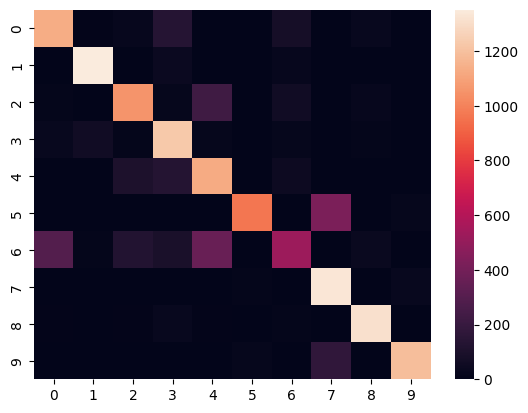

In [ ]:
valid_predictedY = get_metrics(model, reg_param, "Validation", red_validX, validY)

# <font color= 'blue'> Classifying Test Dataset!
## overall accuracy: 81%

*Finalized Model Architecture:*
- PCA
- 90% explained variance; 84 components
- QDA
- 0.07 regularizer parameter

*Class F1-Scores:*
- 0: T-shirt/Top --- 79%
- 1: Trouser --- 95%
- 2: Pullover --- 77%
- 3: Dress --- 84%
- 4: Coat --- 76%
- 5: Sandal --- 77%
- 6: Shirt --- 52%
- 7: Sneaker --- 79%
- 8: Bag --- 94%
- 9: Ankle Boot --- 90%

Testing metrics for QDA...
Testing Classification Report for reg_param = 0.07
              precision    recall  f1-score   support

           0       0.75      0.83      0.79      1356
           1       0.93      0.96      0.95      1353
           2       0.78      0.77      0.77      1437
           3       0.78      0.90      0.84      1487
           4       0.72      0.80      0.76      1437
           5       0.98      0.63      0.77      1415
           6       0.70      0.41      0.52      1346
           7       0.66      0.97      0.79      1396
           8       0.94      0.94      0.94      1391
           9       0.95      0.86      0.90      1382

    accuracy                           0.81     14000
   macro avg       0.82      0.81      0.80     14000
weighted avg       0.82      0.81      0.80     14000

Testing Confusion Matrix:


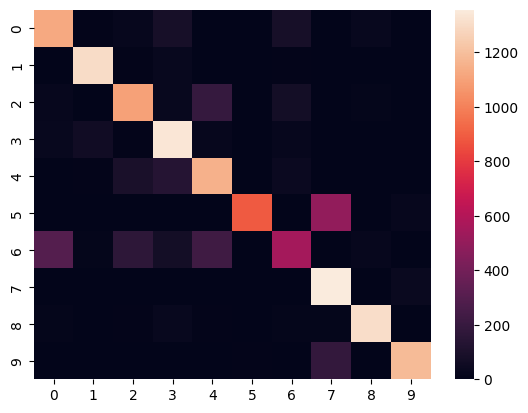

In [ ]:
# re-ran best model code from previous code cell
test_predictedY = get_metrics(model, reg_param, "Testing", red_testX, testY)

# Graphing!

<Figure size 640x480 with 0 Axes>

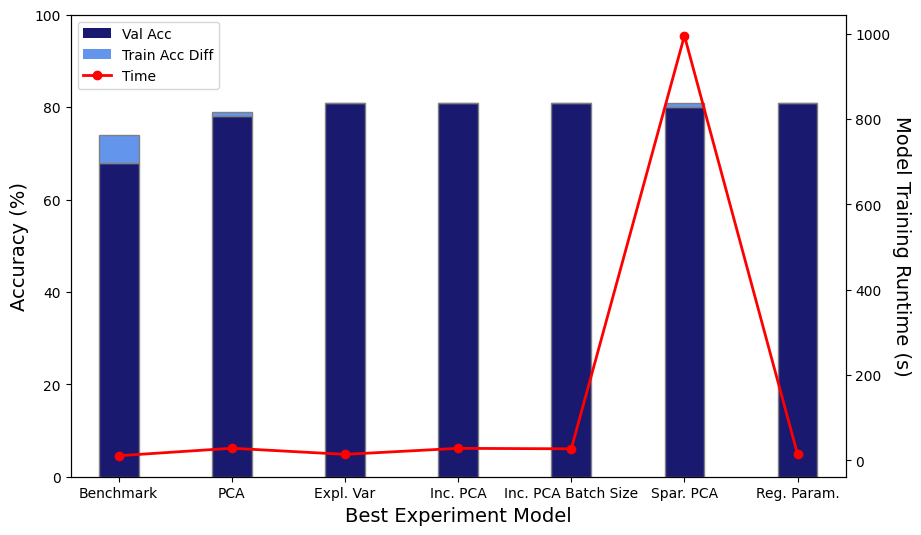

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from scipy import stats

plt.style.use('seaborn-v0_8-dark-palette')
plt.figure()
width = 0.35  # width of a bar

train_run = [10.7, (28.17+0.06), (13.59+0.29), (27.63+0.38), (26.51+0.39), (994.64+0.33), (13.59+0.29)]
stand_train_run = stats.zscore(train_run) # standardized version

xLabels = ["Benchmark", 'PCA', 'Expl. Var', 'Inc. PCA', 'Inc. PCA Batch Size', 'Spar. PCA', 'Reg. Param.']
data = pd.DataFrame({
    'Experiment': xLabels,
    'Train Accuracy': [74, 79, 81, 81, 81, 81, 81],
    'Val Accuracy': [68, 78, 81, 81, 81, 80, 81],
    'Train Runtime': train_run
})


# calculate diff
data['Train Accuracy Diff'] = data['Train Accuracy'] - data['Val Accuracy']

fig, ax = plt.subplots(figsize=(10, 6)) # create fig + axes

# plotting. note: secondary axis!!
data['Val Accuracy'].plot(kind='bar', width=width, ax=ax, color='midnightblue', edgecolor='gray', label='Val Accuracy')
data['Train Accuracy Diff'].plot(kind='bar', width=width, ax=ax, bottom=data['Val Accuracy'], color='cornflowerblue', edgecolor='gray', label='Train Accuracy')
data['Train Runtime'].plot(secondary_y=True, color='red', linewidth=2, linestyle='-', marker='o', ax=ax)

# labels
ax.set_xticklabels(xLabels, fontsize=10)
ax.set_ylabel('Accuracy (%)', fontsize=14)
ax.set_xlabel('Best Experiment Model', fontsize=14)
ax.right_ax.set_ylabel('Model Training Runtime (s)', rotation=-90, labelpad=15, fontsize=14)

ax.set_ylim(0, 100) # y axis scale

# Create legend manually --> had to do manually because of the dual graphs being used
line1, = ax.plot([], [], color='red', linewidth=2, linestyle='-', marker='o', label='Train Runtime')
bar1_proxy = plt.Rectangle((0,0),1,1,fc="midnightblue", edgecolor = 'none')
bar2_proxy = plt.Rectangle((0,0),1,1,fc='cornflowerblue', edgecolor = 'none')
ax.legend([bar1_proxy, bar2_proxy, line1], ['Val Acc', 'Train Acc Diff', 'Time'], loc='upper left')

#plt.suptitle('Overall: Best Experiment Models vs. Accuracy & Runtime', fontsize=16)
# abstracting title for research paper

plt.savefig('overall_exp_plot.png', dpi=300) # save
plt.show() # show

In [ ]:
!pip install tikzplotlib
import tikzplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 3.1 MB/s eta 0:00:00


<Figure size 640x480 with 0 Axes>

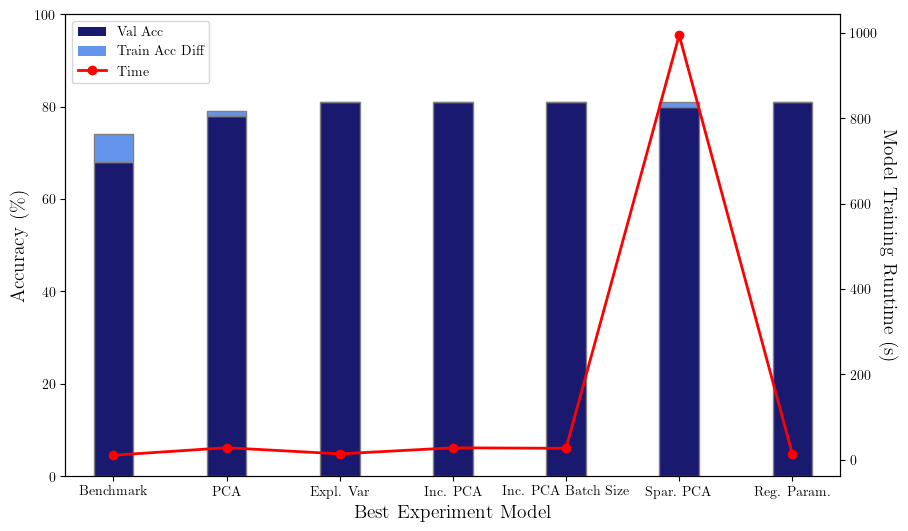

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from scipy import stats
from matplotlib import rc

# Enable LaTeX rendering
plt.rc('text', usetex=True)

plt.style.use('seaborn-v0_8-dark-palette')
plt.figure()
width = 0.35  # width of a bar

train_run = [10.7, (28.17+0.06), (13.59+0.29), (27.63+0.38), (26.51+0.39), (994.64+0.33), (13.59+0.29)]
stand_train_run = stats.zscore(train_run) # standardized version

xLabels = ["Benchmark", 'PCA', 'Expl. Var', 'Inc. PCA', 'Inc. PCA Batch Size', 'Spar. PCA', 'Reg. Param.']
data = pd.DataFrame({
    'Experiment': xLabels,
    'Train Accuracy': [74, 79, 81, 81, 81, 81, 81],
    'Val Accuracy': [68, 78, 81, 81, 81, 80, 81],
    'Train Runtime': train_run
})


# calculate diff
data['Train Accuracy Diff'] = data['Train Accuracy'] - data['Val Accuracy']

fig, ax = plt.subplots(figsize=(10, 6)) # create fig + axes

# plotting. note: secondary axis!!
data['Val Accuracy'].plot(kind='bar', width=width, ax=ax, color='midnightblue', edgecolor='gray', label='Val Accuracy')
data['Train Accuracy Diff'].plot(kind='bar', width=width, ax=ax, bottom=data['Val Accuracy'], color='cornflowerblue', edgecolor='gray', label='Train Accuracy')
data['Train Runtime'].plot(secondary_y=True, color='red', linewidth=2, linestyle='-', marker='o', ax=ax)

# labels
ax.set_xticklabels(xLabels, fontsize=10)
ax.set_ylabel('Accuracy (\%)', fontsize=14)
ax.set_xlabel('Best Experiment Model', fontsize=14)
ax.right_ax.set_ylabel('Model Training Runtime (s)', rotation=-90, labelpad=15, fontsize=14)

ax.set_ylim(0, 100) # y axis scale

# Create legend manually --> had to do manually because of the dual graphs being used
line1, = ax.plot([], [], color='red', linewidth=2, linestyle='-', marker='o', label='Train Runtime')
bar1_proxy = plt.Rectangle((0,0),1,1,fc="midnightblue", edgecolor = 'none')
bar2_proxy = plt.Rectangle((0,0),1,1,fc='cornflowerblue', edgecolor = 'none')
ax.legend([bar1_proxy, bar2_proxy, line1], ['Val Acc', 'Train Acc Diff', 'Time'], loc='upper left')

#plt.suptitle('Overall: Best Experiment Models vs. Accuracy & Runtime', fontsize=16)
# abstracting title for research paper

plt.savefig('overall_exp_plot.png', dpi=300) # save
plt.show() # show

In [ ]:
!sudo apt-get update
!sudo apt-get install -y texlive texlive-latex-extra dvipng cm-super


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,031 kB]
Ign:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,396 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 Packages [33.9 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,598 kB]
Hit:13 http:

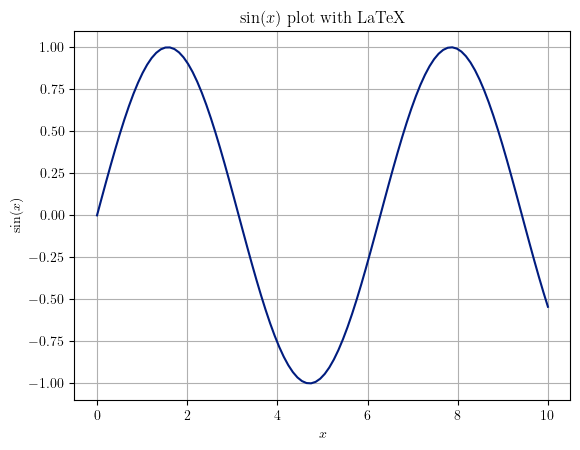

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc

# Enable LaTeX rendering
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Example plot with LaTeX labels
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y)
plt.title(r'$\sin(x)$ plot with LaTeX')
plt.xlabel(r'$x$')
plt.ylabel(r'$\sin(x)$')
plt.grid(True)

# Save the figure
plt.savefig('latex_plot.pdf')  # You can save it as PDF or PNG
plt.show()

from google.colab import files
files.download('latex_plot.pdf')